<p>
  Data Science Bootcamp <br>
  Capstone - Sprint 2<br>
  Xavier Toledo<br>
</p>

# Water access analysis

Water has become a scarce resource in many communities across Canada. For my capstone project, I will analyze available data and leverage machine learning to predict the effects of different stressors. My goal is to help: 1) Corporations optimize their consumption, 2) Non-profit organizations allocate resources to mitigate human impact, and 3) Federal and Provincial government entities plan infrastructure projects more efficiently.



# Table of Contents
* [Part 1 - Data Cleaning](#p1)
    * [Section 1.1](#s1_1)
    * [Section 1.2](#s1_2)
* [Part 2 - Exploratory Data Analysis](#p2)
    * [Section 2.1](#s2_1)
    * [Section 2.2](#s2_2)
* [Part 3 - Statistical Analysis](#p3)
    * [Section 3.1](#s3_1)
    * [Section 3.2](#s3_2)
* [Part 4 - Machine Learning](#p4)
    * [Section 4.1](#s4_1)
    * [Section 4.2](#s4_2)
* [Part 5 - TBD](#p5)
    * [Section 5.1](#s5_1)
    * [Section 5.2](#s5_2)
* [Part 6 - TBD](#p6)
    * [Section 6.1](#s6_1)
    * [Section 6.2](#s6_2)
* [Part 7 - TBD](#p7)
    * [Section 7.1](#s7_1)
    * [Section 7.2](#s7_2)


# Part 1 - Data Loading and Cleaning <a class="anchor" id="p1"></a>

### Section 1.1 - <a id="s1_1"></a>Data collection

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import chi2
import numpy as np

In [3]:
# Colab

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [4]:
# Colab

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Water-Qual-Eau-Fraser-2000-present.csv', index_col=0)


Importing data

In [5]:
# Define the path with .csv files
import os
path = '/content/drive/MyDrive/Colab Notebooks/Data/'
extension = '.csv'

In [6]:
# Creating a list of files
files = [file for file in os.listdir(path) if file.endswith(extension)]

In [7]:
import chardet

# Importing various files into pandas
dfs = []
for file in files:
    try:
        df = pd.read_csv(os.path.join(path, file), encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(os.path.join(path, file), encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(os.path.join(path, file), encoding='ISO-8859-1')
    dfs.append(df)


<ipython-input-7-7e27dedba937>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), encoding='utf-8')
<ipython-input-7-7e27dedba937>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), encoding='utf-8')
<ipython-input-7-7e27dedba937>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), encoding='utf-8')


In [7]:
# df = pd.read_csv(os.path.join(path, file), encoding=encoding)

In [8]:
# Concatenating files into a single dataframe
df1 = pd.concat(dfs, ignore_index=True)

In [9]:
dfv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Water-Qual-Eau-VariableInfo.csv', index_col=0)
dfv.head()

VARIABLE_CODE               VARIABLE            VARIABLE_FR  \
VMV_CODE                                                                
100081              371   ALUMINUM EXTRACTABLE  ALUMINIUM EXTRACTIBLE   
100082              387     BARIUM EXTRACTABLE     BARYUM EXTRACTIBLE   
100083              392  BERYLLIUM EXTRACTABLE  BÉRYLLIUM EXTRACTIBLE   
100084              410    CADMIUM EXTRACTABLE    CADMIUM EXTRACTIBLE   
100085              454     COBALT EXTRACTABLE     COBALT EXTRACTIBLE   

         VARIABLE_TYPE VARIABLE_TYPE_FR UNIT_UNITÉ            UNIT_NAME  \
VMV_CODE                                                                  
100081           METAL           MÉTAUX       MG/L  MILLIGRAM PER LITER   
100082           METAL           MÉTAUX       MG/L  MILLIGRAM PER LITER   
100083           METAL           MÉTAUX       MG/L  MILLIGRAM PER LITER   
100084           METAL           MÉTAUX       MG/L  MILLIGRAM PER LITER   
100085           METAL           MÉTAUX       MG/L  MILLIGRAM PER LITER   

                      UNITÉ_NOM  METHOD_CODE  \
VMV_CODE                                       
100081    MILLIGRAMME PAR LITRE       2628.0   
100082    MILLIGRAMME PAR LITRE       2628.0   
100083    MILLIGRAMME PAR LITRE       2628.0   
100084    MILLIGRAMME PAR LITRE       2628.0   
100085    MILLIGRAMME PAR LITRE       2628.0   

                                               METHOD_TITLE  \
VMV_CODE                                                      
100081    EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...   
100082    EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...   
100083    EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...   
100084    EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...   
100085    EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...   

                         MÉTHODE_TITRE  
VMV_CODE                                
100081    MÉTAUX EXTRACTIBLES PAR ICAP  
100082    MÉTAUX EXTRACTIBLES PAR ICAP  
100083    MÉTAUX EXTRACTIBLES PAR ICAP  
100084    MÉTAUX EXTRACTIBLES PAR ICAP  
100085    MÉTAUX EXTRACTIBLES PAR ICAP

In [10]:
dfn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Water-Qual-Eau-Sites-National.csv', index_col=0)
dfn.head()

SITE_NAME  \
SITE_NO                                                           
00000072      BEAUHARNOIS CANAL AT RTE 132 BRIDGE IN VALLEYF...   
00000075      ST.LAWRENCE RIVER WATER INTAKE AT THE WATER PL...   
00000078      ST.LAWRENCE RIVER WATER INTAKE AT THE WATER PL...   
00BR01AF0084         SAINT JOHN RIVER BELOW ST. BASILE, RTE 144   
00BR01AG0008                AROOSTOOK RIVER ABOVE BRIDGE, RTE 2   

                                                    SITE_NOM_FR  \
SITE_NO                                                           
00000072      CANAL DE BEAUHARNOIS AU PONT-ROUTE 132 À VALLE...   
00000075      FLEUVE SAINT-LAURENT À LA PRISE D'EAU DE L'USI...   
00000078      FLEUVE SAINT-LAURENT À LA PRISE D'EAU DE L'USI...   
00BR01AF0084  RIVIÈRE SAINT-JEAN EN AVAL DE ST. BASILE, ROUT...   
00BR01AG0008        RIVIÈRE AROOSTOOK EN AMONT DU PONT, ROUTE 2   

                                        SITE_TYPE SITE_DESC SITE_DESC_FR  \
SITE_NO                                                                    
00000072      RIVER OR STREAM/RIVIÈRE OU RUISSEAU       NaN          NaN   
00000075      RIVER OR STREAM/RIVIÈRE OU RUISSEAU       NaN          NaN   
00000078      RIVER OR STREAM/RIVIÈRE OU RUISSEAU       NaN          NaN   
00BR01AF0084  RIVER OR STREAM/RIVIÈRE OU RUISSEAU       NaN          NaN   
00BR01AG0008  RIVER OR STREAM/RIVIÈRE OU RUISSEAU       NaN          NaN   

              LATITUDE  LONGITUDE  DATUM PROV_TERR PROV_TERR_FR  \
SITE_NO                                                           
00000072       45.2241   -74.1156  NAD83      QUE.           QC   
00000075       45.8558   -73.2439  NAD83      QUE.           QC   
00000078       45.4129   -73.6347  NAD83      QUE.           QC   
00BR01AF0084   47.3549   -68.2318  NAD83      N.B.        N.-B.   
00BR01AG0008   46.8216   -67.7341  NAD83      N.B.        N.-B.   

                            PEARSEDA                PEARSEDA_FR  \
SITE_NO                                                           
00000072                ST. LAWRENCE              SAINT-LAURENT   
00000075                ST. LAWRENCE              SAINT-LAURENT   
00000078                ST. LAWRENCE              SAINT-LAURENT   
00BR01AF0084  SAINT JOHN - ST. CROIX  SAINT-JEAN - SAINTE-CROIX   
00BR01AG0008  SAINT JOHN - ST. CROIX  SAINT-JEAN - SAINTE-CROIX   

                     OCEANDA        OCEANDA_FR  \
SITE_NO                                          
00000072      ATLANTIC OCEAN  OCÉAN ATLANTIQUE   
00000075      ATLANTIC OCEAN  OCÉAN ATLANTIQUE   
00000078      ATLANTIC OCEAN  OCÉAN ATLANTIQUE   
00BR01AF0084  ATLANTIC OCEAN  OCÉAN ATLANTIQUE   
00BR01AG0008  ATLANTIC OCEAN  OCÉAN ATLANTIQUE   

                                                       DATA_URL  \
SITE_NO                                                           
00000072                                                    NaN   
00000075                                                    NaN   
00000078                                                    NaN   
00BR01AF0084  HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/EN/SAM...   
00BR01AG0008  HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/EN/SAM...   

                                                    DATA_URL_FR  \
SITE_NO                                                           
00000072      HTTP://WWW.MDDELCC.GOUV.QC.CA/EAU/ATLAS_INTERA...   
00000075      HTTP://WWW.MDDELCC.GOUV.QC.CA/EAU/ATLAS_INTERA...   
00000078      HTTP://WWW.MDDELCC.GOUV.QC.CA/EAU/ATLAS_INTERA...   
00BR01AF0084  HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/FR/LIE...   
00BR01AG0008  HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/FR/LIE...   

                                                  OPEN_DATA_URL  
SITE_NO                                                          
00000072      HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
00000075      HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
00000078      HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
00BR01AF0084  HTTPS:

In [11]:
# Joining with Variable information
df_joined = df1.merge(dfv, on='VARIABLE', how='left')
df_joined.head()

SITE_NO   DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  MDL_LDM  \
0  MA05OB0001  2000-01-11 17:20             <         15.9     15.9      NaN   
1  MA05OB0001  2000-01-11 17:20             <         15.9     15.9      NaN   
2  MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
3  MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
4  MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   

   VMV_CODE UNIT_UNITÉ_x                                VARIABLE  \
0    102176         NG/L  2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID   
1    102176         NG/L  2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID   
2    102177         NG/L                               2,3,6-TBA   
3    102177         NG/L                               2,3,6-TBA   
4    102177         NG/L                               2,3,6-TBA   

                              VARIABLE_FR_x  ... VARIABLE_CODE  \
0  ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE  ...        3044.0   
1  ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE  ...        3044.0   
2                                 2,3,6-TBA  ...         203.0   
3                                 2,3,6-TBA  ...         203.0   
4                                 2,3,6-TBA  ...         203.0   

                              VARIABLE_FR_y  VARIABLE_TYPE VARIABLE_TYPE_FR  \
0  ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE     PESTICIDES       PESTICIDES   
1  ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE     PESTICIDES       PESTICIDES   
2                                 2,3,6-TBA     PESTICIDES       PESTICIDES   
3                                 2,3,6-TBA     PESTICIDES       PESTICIDES   
4                                 2,3,6-TBA     PESTICIDES       PESTICIDES   

  UNIT_UNITÉ_y           UNIT_NAME             UNITÉ_NOM METHOD_CODE  \
0         NG/L  NANOGRAM PER LITER  NANOGRAMME PAR LITRE      2865.0   
1         NG/L  NANOGRAM PER LITER  NANOGRAMME PAR LITRE      3002.0   
2         NG/L  NANOGRAM PER LITER  NANOGRAMME PAR LITRE      2865.0   
3         NG/L  NANOGRAM PER LITER  NANOGRAMME PAR LITRE      3002.0   
4         NG/L  NANOGRAM PER LITER  NANOGRAMME PAR LITRE       287.0   

                                        METHOD_TITLE  \
0  ANALYSIS OF ACIDIC HERBICIDES AS PFBB ESTERS B...   
1  ANALYSIS OF ACIDIC HERBICIDES IN WATER USING G...   
2  ANALYSIS OF ACIDIC HERBICIDES AS PFBB ESTERS B...   
3  ANALYSIS OF ACIDIC HERBICIDES IN WATER USING G...   
4  ANALYSIS OF ACIDIC HERBICIDES BY SPE AND LC-MS...   

                                       MÉTHODE_TITRE  
0  ANALYSE D'HERBICIDES ACIDES CONSIDÉRÉS COMME D...  
1  ANALYSE D'HERBICIDES ACIDES DANS L'EAU PAR GC-...  
2  ANALYSE D'HERBICIDES ACIDES CONSIDÉRÉS COMME D...  
3  ANALYSE D'HERBICIDES ACIDES DANS L'EAU PAR GC-...  
4   ANALYSE D'HERBICIDES ACIDES PAR SPE ET LC-MS/MS.  

[5 rows x 22 columns]

In [12]:
# Joining with dataset of National Sites
df = df_joined.merge(dfn, on='SITE_NO', how='left')
df.head()

SITE_NO   DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  MDL_LDM  \
0  MA05OB0001  2000-01-11 17:20             <         15.9     15.9      NaN   
1  MA05OB0001  2000-01-11 17:20             <         15.9     15.9      NaN   
2  MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
3  MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
4  MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   

   VMV_CODE UNIT_UNITÉ_x                                VARIABLE  \
0    102176         NG/L  2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID   
1    102176         NG/L  2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID   
2    102177         NG/L                               2,3,6-TBA   
3    102177         NG/L                               2,3,6-TBA   
4    102177         NG/L                               2,3,6-TBA   

                              VARIABLE_FR_x  ...  DATUM PROV_TERR  \
0  ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE  ...  NAD27      MAN.   
1  ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE  ...  NAD27      MAN.   
2                                 2,3,6-TBA  ...  NAD27      MAN.   
3                                 2,3,6-TBA  ...  NAD27      MAN.   
4                                 2,3,6-TBA  ...  NAD27      MAN.   

   PROV_TERR_FR         PEARSEDA        PEARSEDA_FR     OCEANDA  \
0          MAN.  ASSINIBOINE-RED  ASSINIBOINE-ROUGE  HUDSON BAY   
1          MAN.  ASSINIBOINE-RED  ASSINIBOINE-ROUGE  HUDSON BAY   
2          MAN.  ASSINIBOINE-RED  ASSINIBOINE-ROUGE  HUDSON BAY   
3          MAN.  ASSINIBOINE-RED  ASSINIBOINE-ROUGE  HUDSON BAY   
4          MAN.  ASSINIBOINE-RED  ASSINIBOINE-ROUGE  HUDSON BAY   

      OCEANDA_FR DATA_URL DATA_URL_FR  \
0  BAIE D'HUDSON      NaN         NaN   
1  BAIE D'HUDSON      NaN         NaN   
2  BAIE D'HUDSON      NaN         NaN   
3  BAIE D'HUDSON      NaN         NaN   
4  BAIE D'HUDSON      NaN         NaN   

                                       OPEN_DATA_URL  
0  HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
1  HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
2  HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
3  HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  
4  HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...  

[5 rows x 39 columns]

In [13]:
#display all column names of DataFrame
print(df.columns.tolist())

['SITE_NO', 'DATE_TIME_HEURE', 'FLAG_MARQUEUR', 'VALUE_VALEUR', 'SDL_LDE', 'MDL_LDM', 'VMV_CODE', 'UNIT_UNITÉ_x', 'VARIABLE', 'VARIABLE_FR_x', 'STATUS_STATUT', 'SAMPLE_ID_ÉCHANTILLON', 'VARIABLE_CODE', 'VARIABLE_FR_y', 'VARIABLE_TYPE', 'VARIABLE_TYPE_FR', 'UNIT_UNITÉ_y', 'UNIT_NAME', 'UNITÉ_NOM', 'METHOD_CODE', 'METHOD_TITLE', 'MÉTHODE_TITRE', 'SITE_NAME', 'SITE_NOM_FR', 'SITE_TYPE', 'SITE_DESC', 'SITE_DESC_FR', 'LATITUDE', 'LONGITUDE', 'DATUM', 'PROV_TERR', 'PROV_TERR_FR', 'PEARSEDA', 'PEARSEDA_FR', 'OCEANDA', 'OCEANDA_FR', 'DATA_URL', 'DATA_URL_FR', 'OPEN_DATA_URL']


In [15]:
df.sample(50)

SITE_NO   DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  \
12746383  BC08HB0018  2016-11-30 10:45           NaN         6.66    0.050   
7468636   NS01ED0110  2021-09-06 10:52             <         0.02    0.020   
9251004   NF02YL0106  2016-06-17 11:30           NaN        10.57      NaN   
1870411   SA06EA0003  2022-06-21 10:45           NaN        0.003    0.001   
15280458  AL05BE0013  2008-11-17 17:30           NaN        0.016    0.005   
15645067  MA05PF0022  2014-12-01 12:10           NaN        0.394    0.015   
3870149   BC08NK0003  2009-09-14 15:30           NaN        0.065    0.001   
13835107  NB01AR0021  2009-06-23 10:45           NaN         0.15      NaN   
11085672  BC08NL0001  2005-02-01 11:55           NaN         0.21    0.020   
1297495   NW10OB0006  2008-07-29 14:40           NaN        0.003    0.001   
512053    MA05OC0001  2017-11-28 09:30           NaN         42.3    0.050   
1354396   NW10TB0002  2000-06-26 12:00             <        0.005    0.005   
18231512  BC08MH0027  2008-11-05 12:15           NaN          7.9    0.100   
8968227   NF02YG0001  2012-05-24 14:15           NaN         0.16      NaN   
7047604   NS01ED0005  2019-11-20 10:35           NaN        212.0    5.000   
7990291   NS01FB0001  2014-10-14 16:45           NaN        0.003    0.002   
404979    MA05OC0001  2014-11-12 08:35           NaN        0.008    0.001   
5453644   NW10EC0021  2021-06-21 12:36           NaN        0.020    0.002   
3986288   BC08NK0003  2018-10-21 13:00             <          1.0    1.000   
18359571  BC08MH0027  2016-12-07 11:45           NaN         2.08    0.050   
2034836   BC08NA0048  2004-09-28 10:40           NaN         11.5    0.050   
16768805  BC08KH0012  2016-08-14 11:15           NaN         51.0    1.000   
10142844  NF02ZM0176  2013-09-19 11:00           NaN         37.7      NaN   
2443474   BC08NE0001  2003-10-27 10:00           NaN         13.3    0.200   
12345379  BC08GA0010  2010-07-19 11:32           NaN          1.3    0.500   
755370    SA05JM0014  2010-08-16 14:00           NaN        0.212    0.005   
13401414  YT08AB0009  2004-10-26 12:50           NaN         64.5    0.500   
4404822   BC08NN0011  2013-06-24 09:00           NaN         53.0    1.000   
1513518   AL06AD0001  2005-11-16 12:30           NaN         0.80    0.010   
10681621  NF03OE0032  2017-08-22 15:30           NaN        323.0    0.500   
156233    MA05OB0001  2021-10-19 12:45           NaN         93.3    0.050   
6941209   NS01ED0005  2006-10-16 12:00           NaN         0.38      NaN   
15155364  AL05BA0011  2015-02-24 09:30             <        0.001    0.001   
3179688   BC08NE0029  2000-12-18 13:00           NaN          1.6    0.500   
12224077  BC08FC0001  2012-06-20 10:00           NaN         12.6    0.050   
14959839  AL05AK0001  2014-03-05 10:15           NaN        0.001    0.001   
14940736  AL05AK0001  2011-12-07 11:00           NaN         10.4    0.010   
4513065   BC08NN0021  2007-02-27 15:00           NaN        0.186    0.005   
17186253  BC08LE0004  2006-03-28 08:30           NaN         11.6    0.100   
6721408   NS01DC0203  2010-09-13 12:20           NaN          3.0      NaN   
5484179   NW10ED0001  2008-07-15 14:30             <        0.005    0.005   
10879726  NF03PB0032  2019-07-26 10:00           NaN         0.03    0.030   
17342949  BC08LE0004  2023-12-12 11:17           NaN         58.6    0.050   
4278011   BC08NK0004  2022-09-05 12:15           NaN        0.069    0.004   
16566653  BC08KE0010  2013-05-29 09:40           NaN         0.61    0.010   
15649139  MA05PF0022  2015-06-15 08:15           NaN            3   10.000   
15105511  AL05BA0011  2009-01-21 10:00           NaN         10.1    0.010   
8448302   AL05DA0001  2013-12-17 11:30           NaN         0.09    0.010   
13091767  BC08HD0004  2007-02-12 12:45           NaN        0.004    0.001   
10867915  NF03PB0032  2009-10-27 14:05           NaN        0.226      NaN   

          MDL_LDM  VMV_CODE UNIT_U

<font color='blue'> For Sprint 2 we loaded additional datasets to include the different river basins all over Canada.</font>

### Data Dictionary

<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 15 (filtered)">
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
@font-face
	{font-family:Calibri;
	panose-1:2 15 5 2 2 2 4 3 2 4;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:8.0pt;
	margin-left:0in;
	line-height:107%;
	font-size:11.0pt;
	font-family:"Calibri",sans-serif;}
.MsoPapDefault
	{margin-bottom:8.0pt;
	line-height:107%;}
@page WordSection1
	{size:8.5in 11.0in;
	margin:1.0in 1.0in 1.0in 1.0in;}
div.WordSection1
	{page:WordSection1;}
-->

</head>

<body lang=EN-CA style='word-wrap:break-word'>

<div class=WordSection1>

<table class=MsoNormalTable border=1 cellspacing=0 cellpadding=0 width=630
 style='width:472.25pt;border-collapse:collapse;border:none'>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;padding:
  0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Variable</span></b></p>
  </td>
  <td width=175 style='width:131.15pt;border:solid windowtext 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Column Name</span></b></p>
  </td>
  <td width=307 style='width:230.3pt;border:solid windowtext 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Description</span></b></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DATE AND TIME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATE_TIME_HEURE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DATE AND TIME IN DD/MM/YYYY HH:MM FORMAT USING
  LOCAL TIME ZONE</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM USED FOR LATITUDE AND LONGITUDE</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT FLAG</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FLAG_MARQUEUR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FLAG APPLICABLE TO MEASUREMENT VALUE (&lt;-LESS THAN,
  T-TRACE VALUE REPORTED BELOW DETECTION LIMIT BY LABORATORY)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE IN DECIMAL DEGREES FOR THE NOTED DATUM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE IN DECIMAL DEGREES FOR THE NOTED DATUM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD DETECTION LIMIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MDL_LDM</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD DETECTION LIMIT REPORTED BY THE LABORATORY FOR THE
  NOTED METHOD</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC ANALYTICAL METHOD CODE FROM THE NATIONAL VMV
  DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SHORT METHOD TITLE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD_TITLE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SHORT METHOD TITLE FROM THE NATIONAL VMV DICTIONARY.
  FULL METHOD DESCRIPTIONS AVAILABLE UPON REQUEST AT
  EC.MSQEINFORMATION-WQMSINFORMATION.EC@CANADA.CA</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEAN DRAINAGE AREA</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEANDA</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEAN DRAINAGE AREA THAT MONITORING SITE IS LOCATED IN </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSE DRAINAGE AREA</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSEDA</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSE DRAINAGE AREA THAT MONITORING SITE IS LOCATED IN </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROVINCE/TERRITORY</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROV_TERR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROVINCE OR TERRITORY THAT MONITORING SITE IS LOCATED IN</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE IDENTIFIER</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE_ID_ÉCHANTILLON</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIQUE SAMPLE IDENTIFIER FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:45.25pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DETECTION LIMIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SDL_LDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DETECTION LIMIT REPORTED BY THE LABORATORY FOR THE
  SPECIFIC ANALYIS OF THE REPORTED MEASUREMENT.  ELEVATED SAMPLE DETECTION
  LIMIT ABOVE METHOD DETECTION LIMITS MAY INDICATE DILUTION, MATRIX
  INTERFERENCE OR OTHER ISSUES WITH THE SPECIFIC ANALYSIS.</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE DESCRIPTION</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_DESC</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE DESCRIPTION THAT MAY INCLUDE SPECIFIC SAMPLING
  LOCATION, RATIONALE FOR MONITORING LOCATION (E.G. REFERENCE,
  UPSTREAM/DOWNSTREAM, ETC.), AND LOCAL LAND-USE INFORMATION. </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_NAME</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FULL SITE NAME FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE NUMBER</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_NO</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIQUE SITE NUMBER/IDENTIFICATION FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE TYPE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_TYPE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE SITE TYPE (E.G. RIVER, LAKE, ETC.)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VALIDATION STATUS</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>STATUS_STATUT</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LEVEL OF VALIDATION (P-PROVISIONAL, V-VALIDATED)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT_NAME</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FULL MEASUREMENT UNIT NAME FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT_UNITÉ</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT UNIT ABBREVIATION FROM NATIONAL VMV
  DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT VALUE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VALUE_VALEUR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT VALUE OR CONCENTRATION</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE NAME FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC VARIABLE CODE FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE TYPE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE_TYPE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE TYPE FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VMV CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VMV_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC VALID METHOD VARIABLE (VMV) CODE FROM NATIONAL
  VMV DICTIONARY</span></p>
  </td>
 </tr>
</table>

<p class=MsoNormal>&nbsp;</p>

</div>

</body>

</html>


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18761830 entries, 0 to 18761829
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SITE_NO                object 
 1   DATE_TIME_HEURE        object 
 2   FLAG_MARQUEUR          object 
 3   VALUE_VALEUR           object 
 4   SDL_LDE                float64
 5   MDL_LDM                float64
 6   VMV_CODE               int64  
 7   UNIT_UNITÉ_x           object 
 8   VARIABLE               object 
 9   VARIABLE_FR_x          object 
 10  STATUS_STATUT          object 
 11  SAMPLE_ID_ÉCHANTILLON  object 
 12  VARIABLE_CODE          float64
 13  VARIABLE_FR_y          object 
 14  VARIABLE_TYPE          object 
 15  VARIABLE_TYPE_FR       object 
 16  UNIT_UNITÉ_y           object 
 17  UNIT_NAME              object 
 18  UNITÉ_NOM              object 
 19  METHOD_CODE            float64
 20  METHOD_TITLE           object 
 21  MÉTHODE_TITRE          object 
 22  SITE_NAME       

Dropping all Columns in French as they contain same values as the equivalent columns in English

In [14]:
# Drop columns ending with '_FR'
df = df.drop(df.filter(regex='_FR$').columns, axis=1)

In [17]:
df.head(25)

SITE_NO   DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  MDL_LDM  \
0   MA05OB0001  2000-01-11 17:20             <         15.9     15.9      NaN   
1   MA05OB0001  2000-01-11 17:20             <         15.9     15.9      NaN   
2   MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
3   MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
4   MA05OB0001  2000-01-11 17:20             <         11.1     11.1      NaN   
5   MA05OB0001  2000-01-11 17:20           NaN          107      1.0      NaN   
6   MA05OB0001  2000-01-11 17:20           NaN          107      1.0      NaN   
7   MA05OB0001  2000-01-11 17:20             <         31.8     31.8      NaN   
8   MA05OB0001  2000-01-11 17:20             <         31.8     31.8      NaN   
9   MA05OB0001  2000-01-11 17:20             <         31.8     31.8      NaN   
10  MA05OB0001  2000-01-11 17:20             <         31.8     31.8      NaN   
11  MA05OB0001  2000-01-11 17:20             <         47.0     47.0      NaN   
12  MA05OB0001  2000-01-11 17:20             <         47.0     47.0      NaN   
13  MA05OB0001  2000-01-11 17:20             <         47.0     47.0      NaN   
14  MA05OB0001  2000-01-11 17:20             <         47.0     47.0      NaN   
15  MA05OB0001  2000-01-11 17:20             <         14.7     14.7      NaN   
16  MA05OB0001  2000-01-11 17:20             <         14.7     14.7      NaN   
17  MA05OB0001  2000-01-11 17:20             <         14.7     14.7      NaN   
18  MA05OB0001  2000-01-11 17:20             <         14.7     14.7      NaN   
19  MA05OB0001  2000-01-11 17:20             <         14.7     14.7      NaN   
20  MA05OB0001  2000-01-11 17:20             <         14.7     14.7      NaN   
21  MA05OB0001  2000-01-11 17:20           NaN         328.      0.1      NaN   
22  MA05OB0001  2000-01-11 17:20           NaN         328.      0.1      NaN   
23  MA05OB0001  2000-01-11 17:20           NaN         328.      0.1      NaN   
24  MA05OB0001  2000-01-11 17:20           NaN         328.      0.1      NaN   

    VMV_CODE UNIT_UNITÉ_x                                     VARIABLE  \
0     102176         NG/L       2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID   
1     102176         NG/L       2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID   
2     102177         NG/L                                    2,3,6-TBA   
3     102177         NG/L                                    2,3,6-TBA   
4     102177         NG/L                                    2,3,6-TBA   
5     102180            %       2,3-DICHLOROPHENOXYACETIC ACID (2,3-D)   
6     102180            %       2,3-DICHLOROPHENOXYACETIC ACID (2,3-D)   
7     102182         NG/L  2,4,5-TRICHLOROPHENOXYACITIC ACID (2,4,5-T)   
8     102182         NG/L  2,4,5-TRICHLOROPHENOXYACITIC ACID (2,4,5-T)   
9     102182         NG/L  2,4,5-TRICHLOROPHENOXYACITIC ACID (2,4,5-T)   
10    102182         NG/L  2,4,5-TRICHLOROPHENOXYACITIC ACID (2,4,5-T)   
11    102184         NG/L                  2,4-D BUTYRIC ACID (2,4-DB)   
12    102184         NG/L                  2,4-D BUTYRIC ACID (2,4-DB)   
13    102184         NG/L                  2,4-D BUTYRIC ACID (2,4-DB)   
14    102184         NG/L                  2,4-D BUTYRIC ACID (2,4-DB)   
15    102178         NG/L       2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)   
16    102178         NG/L       2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)   
17    102178         NG/L       2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)   
18    102178         NG/L       2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)   
19    102178         NG/L       2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)   
20    102178         NG/L       2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)   
21     10111         MG/L                       ALKALINITY TOTAL CACO3   
22     10111         MG/L                       ALKALINITY TOTAL CACO3   
23     10111         MG/L                       ALKALINITY TOTAL CACO3   
24     10111         MG/L                       AL

In [18]:
# Displaying the shape of the DataFrame
df.shape

(18761830, 32)

In [19]:
# Checking for Nulls
null_values = df.isnull()

print("Null Values in DataFrame:")
print(null_values)

Null Values in DataFrame:
          SITE_NO  DATE_TIME_HEURE  FLAG_MARQUEUR  VALUE_VALEUR  SDL_LDE  \
0           False            False          False         False    False   
1           False            False          False         False    False   
2           False            False          False         False    False   
3           False            False          False         False    False   
4           False            False          False         False    False   
...           ...              ...            ...           ...      ...   
18761825    False            False           True         False    False   
18761826    False            False           True         False    False   
18761827    False            False           True         False    False   
18761828    False            False           True         False    False   
18761829    False            False           True         False    False   

          MDL_LDM  VMV_CODE  UNIT_UNITÉ_x  VARIABLE  VARIABLE

<font color='blue'> Although there are some Null values, they are isolated to the Flag and MDL variables which I will not use before my modeling. Hence, no action taken at this time. </font>

In [17]:
# Checking for duplicate rows

df.duplicated().sum()

896644

In [ ]:
# Checking for duplicate columns

df.T.head()

<font color='blue'> Results show multiple Variables and Sample IDs for each Site, as expected.</font>

In [18]:
df['VARIABLE'].value_counts()

CALCIUM DISSOLVED                                                   582696
PHOSPHORUS TOTAL                                                    567182
MAGNESIUM DISSOLVED                                                 550732
TURBIDITY                                                           467632
NITROGEN TOTAL                                                      392366
                                                                     ...  
TRICHLOROETHENE OR ACETYLENE TRICHLORIDE OR ETHYLENE TRICHLORIDE         1
TRICHLOROFLUOROMETHANE                                                   1
VINYLIDENE CHLORIDE (11-DICHLOROETHENE OR 11-DCE))                       1
OIL AND GREASE, VISIBLE                                                  1
TRANS-13-DICHLOROPROPENE                                                 1
Name: VARIABLE, Length: 906, dtype: int64

In [19]:
# Get top 25 Variables for illustration purposes

value_counts = df['VARIABLE'].value_counts()  # Count occurrences of each unique value

top_25_counts = value_counts.nlargest(25)

top_25_counts

CALCIUM DISSOLVED             582696
PHOSPHORUS TOTAL              567182
MAGNESIUM DISSOLVED           550732
TURBIDITY                     467632
NITROGEN TOTAL                392366
PHOSPHORUS TOTAL DISSOLVED    367794
LEAD TOTAL                    327006
IRON TOTAL                    326223
CHLORIDE DISSOLVED            323030
SODIUM DISSOLVED/FILTERED     316935
COBALT TOTAL                  291088
BARIUM TOTAL                  290880
VANADIUM TOTAL                290832
NICKEL TOTAL                  290800
CADMIUM TOTAL                 290680
STRONTIUM TOTAL               290672
MOLYBDENUM TOTAL              290416
MANGANESE TOTAL               290376
COPPER TOTAL                  290304
ZINC TOTAL                    289632
CHROMIUM TOTAL                289416
SILVER TOTAL                  287872
SULPHATE DISSOLVED            278289
ALUMINUM TOTAL                254100
BERYLLIUM TOTAL               252399
Name: VARIABLE, dtype: int64

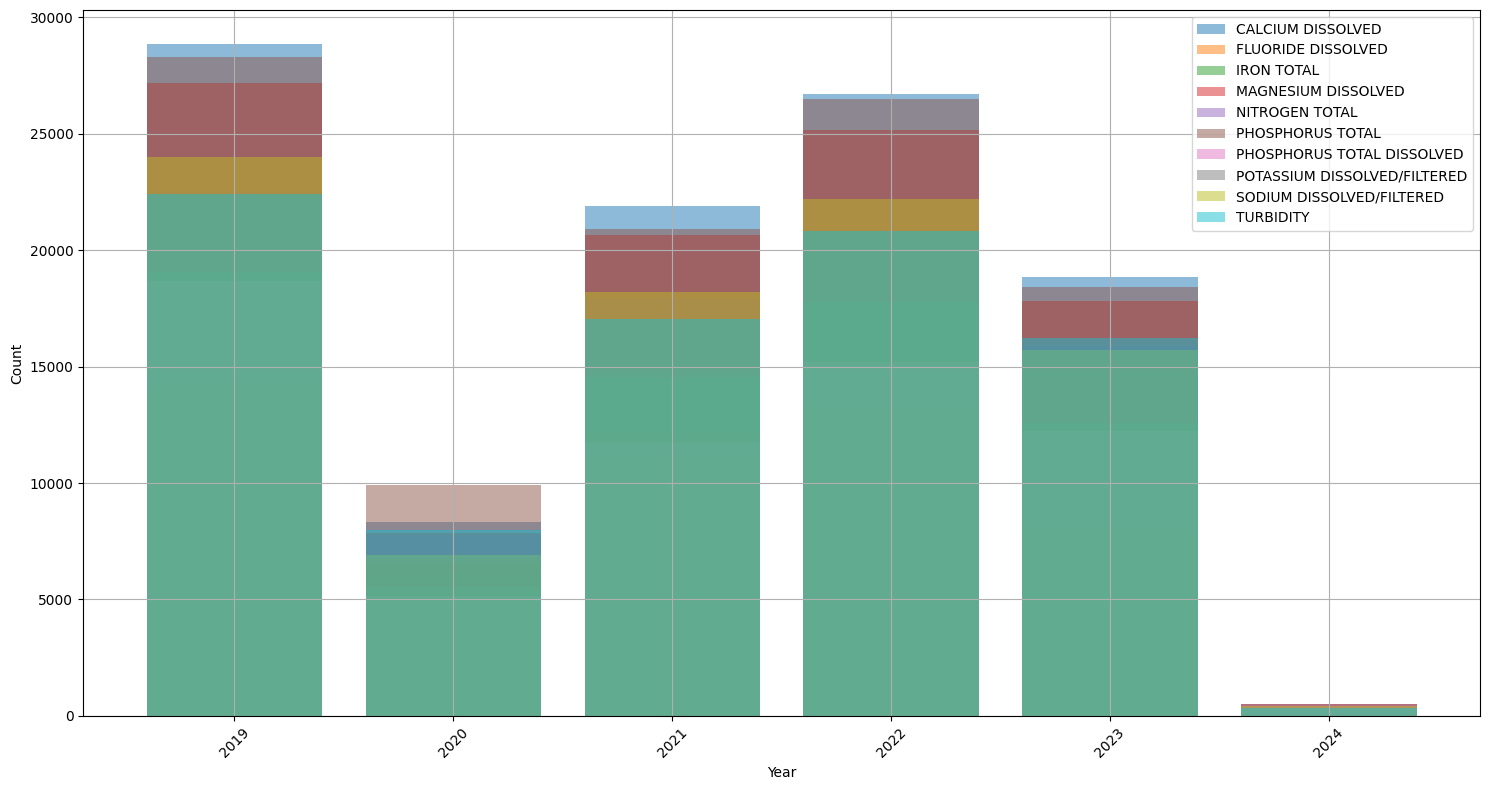

In [15]:
import matplotlib.pyplot as plt

# # Convert 'DATE_TIME_HEURE' column to datetime
df['DATE_TIME_HEURE'] = pd.to_datetime(df['DATE_TIME_HEURE'])

# Extract year from 'DATE_TIME_HEURE' column
df['Year'] = df['DATE_TIME_HEURE'].dt.year

# Filter data for the last 5 years
last_5_years_data = df[df['Year'] >= df['Year'].max() - 5]

# Calculate top 10 variables overall for the last 5 years
top_10_variables = last_5_years_data['VARIABLE'].value_counts().nlargest(10).index

# Filter the DataFrame to include data for these top 10 variables
filtered_data = last_5_years_data[last_5_years_data['VARIABLE'].isin(top_10_variables)]

# Group by variable and year, and count occurrences
variable_counts_by_year = filtered_data.groupby(['VARIABLE', 'Year']).size().unstack()

# Plot a bar chart for each variable, showing counts over the years
plt.figure(figsize=(15, 8))

for variable in variable_counts_by_year.index:
    plt.bar(variable_counts_by_year.columns, variable_counts_by_year.loc[variable], alpha=0.5, label=variable)

#plt.title('Counts of Top 10 VARIABLEs Over the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
print(df['Year'])

0           2000
1           2000
2           2000
3           2000
4           2000
            ... 
18761825    2023
18761826    2023
18761827    2023
18761828    2023
18761829    2023
Name: Year, Length: 18761830, dtype: int64


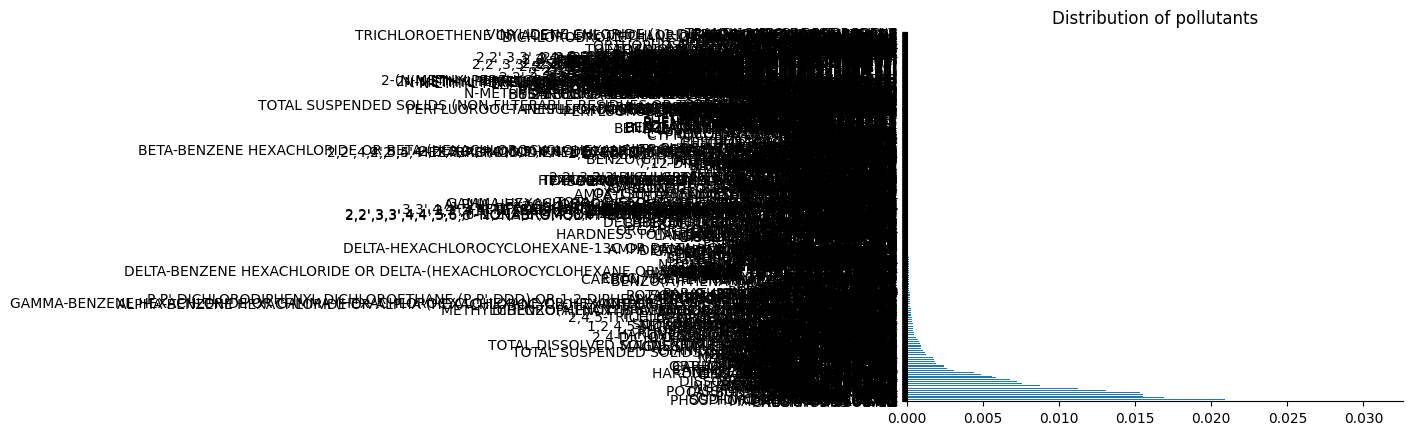

In [22]:
df["VARIABLE"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of pollutants")
sns.despine()
plt.show()

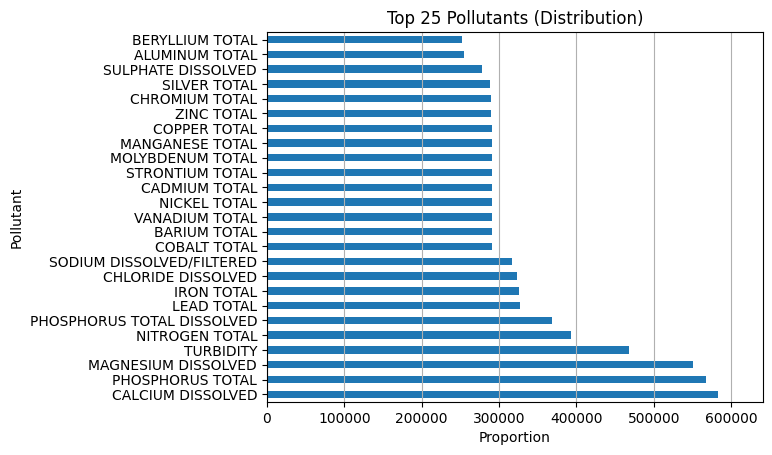

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 25 value counts
top_25_counts = df["VARIABLE"].value_counts().head(25)

# Create the bar chart
top_25_counts.plot(kind="barh")  # Horizontal bar chart

# Customize the plot
plt.title("Top 25 Pollutants (Distribution)")
plt.xlabel("Proportion")
plt.ylabel("Pollutant")
plt.grid(axis='x')  # Add gridlines on the x-axis

# Limit the x-axis range to improve readability (optional)
plt.xlim(0, top_25_counts.max() * 1.1)  # Adjust the multiplier as needed

plt.show()


In [24]:
# 2. Check for missing values (optional)
print(df['DATE_TIME_HEURE'].isnull().sum())  # This will print the number of missing values


0


In [25]:
df.groupby('VARIABLE').sum(numeric_only=True)

SDL_LDE   MDL_LDM     VMV_CODE  \
VARIABLE                                                                    
1,2,4,5-TETRABROMOBENZENE (1,2,4,5-TBB)   7084.000     0.000    656030452   
1,3,5-TRIBROMOBENZENE                      464.000     0.000      6567480   
1,3-DIBROMOBENZENE                         217.000     0.000      1750973   
1-METHYLNAPHTHALENE                       8121.600     0.000     38399752   
1-NAPHTHOL                               39055.840  3137.990      6722560   
...                                            ...       ...          ...   
ZINC SUSPENDED                               0.000     1.449     78037986   
ZINC TOTAL                               34023.288  6581.840  29969202848   
ZINC TOTAL RECOVERABLE                     308.620   308.620     17089556   
ZIRCONIUM DISSOLVED                         13.070     0.000      7890359   
ZIRCONIUM TOTAL                             27.550    11.300     16692545   

                                         VARIABLE_CODE  METHOD_CODE  \
VARIABLE                                                              
1,2,4,5-TETRABROMOBENZENE (1,2,4,5-TBB)      1749748.0   17871161.0   
1,3,5-TRIBROMOBENZENE                         112752.0     829168.0   
1,3-DIBROMOBENZENE                            358267.0     154070.0   
1-METHYLNAPHTHALENE                           116936.0    1076488.0   
1-NAPHTHOL                                   1729164.0    2174742.0   
...                                                ...          ...   
ZINC SUSPENDED                               1755828.0    4599460.0   
ZINC TOTAL                                 257772480.0  687188124.0   
ZINC TOTAL RECOVERABLE                       1850607.0    5107343.0   
ZIRCONIUM DISSOLVED                          3581180.0    4612403.0   
ZIRCONIUM TOTAL                              2796325.0    9719640.0   

                                             LATITUDE     LONGITUDE       Year  
VARIABLE                                                                        
1,2,4,5-TETRABROMOBENZENE (1,2,4,5-TBB)  3.908430e+05 -7.650558e+05   14249112  
1,3,5-TRIBROMOBENZENE                    2.476425e+04 -4.907507e+04     937326  
1,3-DIBROMOBENZENE                       1.161924e+04 -2.302053e+04     438663  
1-METHYLNAPHTHALENE                      2.418727e+04 -4.543241e+04     754822  
1-NAPHTHOL                               5.696918e+04 -8.981608e+04    2481952  
...                                               ...           ...        ...  
ZINC SUSPENDED                           8.383241e+04 -1.318638e+05    3640131  
ZINC TOTAL                               1.499464e+07 -3.011656e+07  582710656  
ZINC TOTAL RECOVERABLE                   9.461415e+04 -1.361924e+05    4195486  
ZIRCONIUM DISSOLVED                      7.080713e+04 -1.437914e+05    2641634  
ZIRCONIUM TOTAL                          1.437464e+05 -2.471842e+05    5567701  

[906 rows x 8 columns]

In [26]:
df.groupby('SAMPLE_ID_ÉCHANTILLON').sum(numeric_only=True)

SDL_LDE  MDL_LDM  VMV_CODE  VARIABLE_CODE  METHOD_CODE  \
SAMPLE_ID_ÉCHANTILLON                                                           
00PY000043             57.9289      0.0  25534164       225931.0     892219.0   
00PY000047             31.6829      0.0  17523493       133023.0     571541.0   
00PY000049             67.1183      0.0  19560234       156569.0     712023.0   
00PY000069             59.0309      0.0  25711605       213712.0     846382.0   
00PY000070             51.6697      0.0  16725079       154908.0     679712.0   
...                        ...      ...       ...            ...          ...   
24PY000136             69.5630      0.0   2535682       134850.0     481525.0   
24PY000137             88.8390      0.0   1987101       173930.0     612685.0   
24PY000138             78.4000      0.0   2408510       151387.0     523643.0   
24PY000139             84.6460      0.0   1252180       154700.0     541687.0   
24PY000140             72.5860      0.0   1179634       134025.0     477906.0   

                          LATITUDE    LONGITUDE    Year  
SAMPLE_ID_ÉCHANTILLON                                    
00PY000043             16571.58906 -39750.17228  676000  
00PY000047             10903.95180 -25880.63568  444000  
00PY000049             12835.90170 -30058.59222  522000  
00PY000069             15861.78923 -39718.28042  634000  
00PY000070             12825.23033 -30190.57855  506000  
...                            ...          ...     ...  
24PY000136              9171.76560 -21325.82200  331936  
24PY000137             11318.89896 -26229.48696  437184  
24PY000138             11276.94688 -23110.33616  380512  
24PY000139              9306.71343 -23170.59108  382536  
24PY000140              8593.21446 -21132.71238  352176  

[48873 rows x 8 columns]

In [27]:
# a TRue/False array, marking whether a row appears more than once
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
18761825    False
18761826     True
18761827     True
18761828    False
18761829    False
Length: 18761830, dtype: bool

In [28]:
df.duplicated().sum()

896644

In [29]:
# the % of duplicates
df.duplicated().sum()/df.shape[0]*100

4.779086048642377

<font color='blue'> We noticed a low percentage of duplicates.</font>

In [30]:
df.loc[df.duplicated(), :].sort_values("DATE_TIME_HEURE")

SITE_NO     DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  \
11799073  AK08DC0001 2000-01-02 14:30:00           NaN       0.0092   0.0001   
11799103  AK08DC0001 2000-01-02 14:30:00           NaN         0.14   0.0200   
11799105  AK08DC0001 2000-01-02 14:30:00           NaN         7.91   0.0100   
11799146  AK08DC0001 2000-01-02 14:30:00           NaN        0.141   0.0001   
11799158  AK08DC0001 2000-01-02 14:30:00           NaN         0.56   0.0500   
...              ...                 ...           ...          ...      ...   
18650086  BC08MH0269 2024-01-23 13:55:00           NaN          4.6   1.0000   
18650105  BC08MH0269 2024-01-23 13:55:00             <          2.0   2.0000   
18650119  BC08MH0269 2024-01-23 13:55:00           NaN         1.42   0.1000   
18650125  BC08MH0269 2024-01-23 13:55:00           NaN         1.42   0.1000   
18650054  BC08MH0269 2024-01-23 13:55:00           NaN         6.39   0.1000   

          MDL_LDM  VMV_CODE UNIT_UNITÉ_x                   VARIABLE  \
11799073      NaN    100225         MG/L            MANGANESE TOTAL   
11799103      NaN      7657         MG/L   NITROGEN TOTAL DISSOLVED   
11799105      NaN     10301           PH                         PH   
11799146      NaN    100229         MG/L            STRONTIUM TOTAL   
11799158      NaN      2074          NTU                  TURBIDITY   
...           ...       ...          ...                        ...   
18650086      NaN      1961         MG/L      RESIDUE NONFILTERABLE   
18650105      NaN      1981         MG/L  SODIUM DISSOLVED/FILTERED   
18650119      NaN       157          NTU                  TURBIDITY   
18650125      NaN       157          NTU                  TURBIDITY   
18650054      NaN      1965           PH                         PH   

                   VARIABLE_FR_x  ...  \
11799073         MANGANÈSE TOTAL  ...   
11799103     AZOTE TOTAL DISSOUS  ...   
11799105                      PH  ...   
11799146         STRONTIUM TOTAL  ...   
11799158               TURBIDITÉ  ...   
...                          ...  ...   
18650086  RÉSIDUS NON-FILTRABLES  ...   
18650105   SODIUM DISSOUS/FILTRÉ  ...   
18650119               TURBIDITÉ  ...   
18650125               TURBIDITÉ  ...   
18650054                      PH  ...   

                                                  SITE_DESC  LATITUDE  \
11799073  SITE IS LOCATED NEAR THE MOUTH, 1 KM NORTH OF ...  55.92540   
11799103  SITE IS LOCATED NEAR THE MOUTH, 1 KM NORTH OF ...  55.92540   
11799105  SITE IS LOCATED NEAR THE MOUTH, 1 KM NORTH OF ...  55.92540   
11799146  SITE IS LOCATED NEAR THE MOUTH, 1 KM NORTH OF ...  55.92540   
11799158  SITE IS LOCATED NEAR THE MOUTH, 1 KM NORTH OF ...  55.92540   
...                                                     ...       ...   
18650086  SAMPLED FROM LEFT BANK UPSTREAM OF 132ND AVENU...  49.24187   
18650105  SAMPLED FROM LEFT BANK UPSTREAM OF 132ND AVENU...  49.24187   
18650119  SAMPLED FROM LEFT BANK UPSTREAM OF 132ND AVENU...  49.24187   
18650125  SAMPLED FROM LEFT BANK UPSTREAM OF 132ND AVENU...  49.24187   
18650054  SAMPLED FROM LEFT BANK UPSTREAM OF 132ND AVENU...  49.24187   

          LONGITUDE  DATUM PROV_TERR               PEARSEDA        OCEANDA  \
11799073 -130.03550  NAD83      B.C.        PACIFIC COASTAL  PACIFIC OCEAN   
11799103 -130.03550  NAD83      B.C.        PACIFIC COASTAL  PACIFIC OCEAN   
11799105 -130.03550  NAD83      B.C.        PACIFIC COASTAL  PACIFIC OCEAN   
11799146 -130.03550  NAD83      B.C.        PACIFIC COASTAL  PACIFIC OCEAN   
11799158 -130.03550  NAD83      B.C.        PACIFIC COASTAL  PACIFIC OCEAN   
...             ...    ...       ...                    ...            ...   
18650086 -122.59572  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
18650105 -122.59572  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
18650119 -122.59572  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
18650125 -122.59572  NAD83      B.C.  FRASER-LOWE

In [31]:
df["VALUE_VALEUR"].describe()

count     1.876137e+07
unique    7.109300e+04
top       1.000000e-03
freq      3.902310e+05
Name: VALUE_VALEUR, dtype: float64

In [32]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['SITE_NO', 'FLAG_MARQUEUR', 'VALUE_VALEUR', 'UNIT_UNITÉ_x', 'VARIABLE',
       'VARIABLE_FR_x', 'STATUS_STATUT', 'SAMPLE_ID_ÉCHANTILLON',
       'VARIABLE_FR_y', 'VARIABLE_TYPE', 'UNIT_UNITÉ_y', 'UNIT_NAME',
       'UNITÉ_NOM', 'METHOD_TITLE', 'MÉTHODE_TITRE', 'SITE_NAME', 'SITE_TYPE',
       'SITE_DESC', 'DATUM', 'PROV_TERR', 'PEARSEDA', 'OCEANDA', 'DATA_URL',
       'OPEN_DATA_URL'],
      dtype='object')

NameError: name 'categorical_columns' is not defined

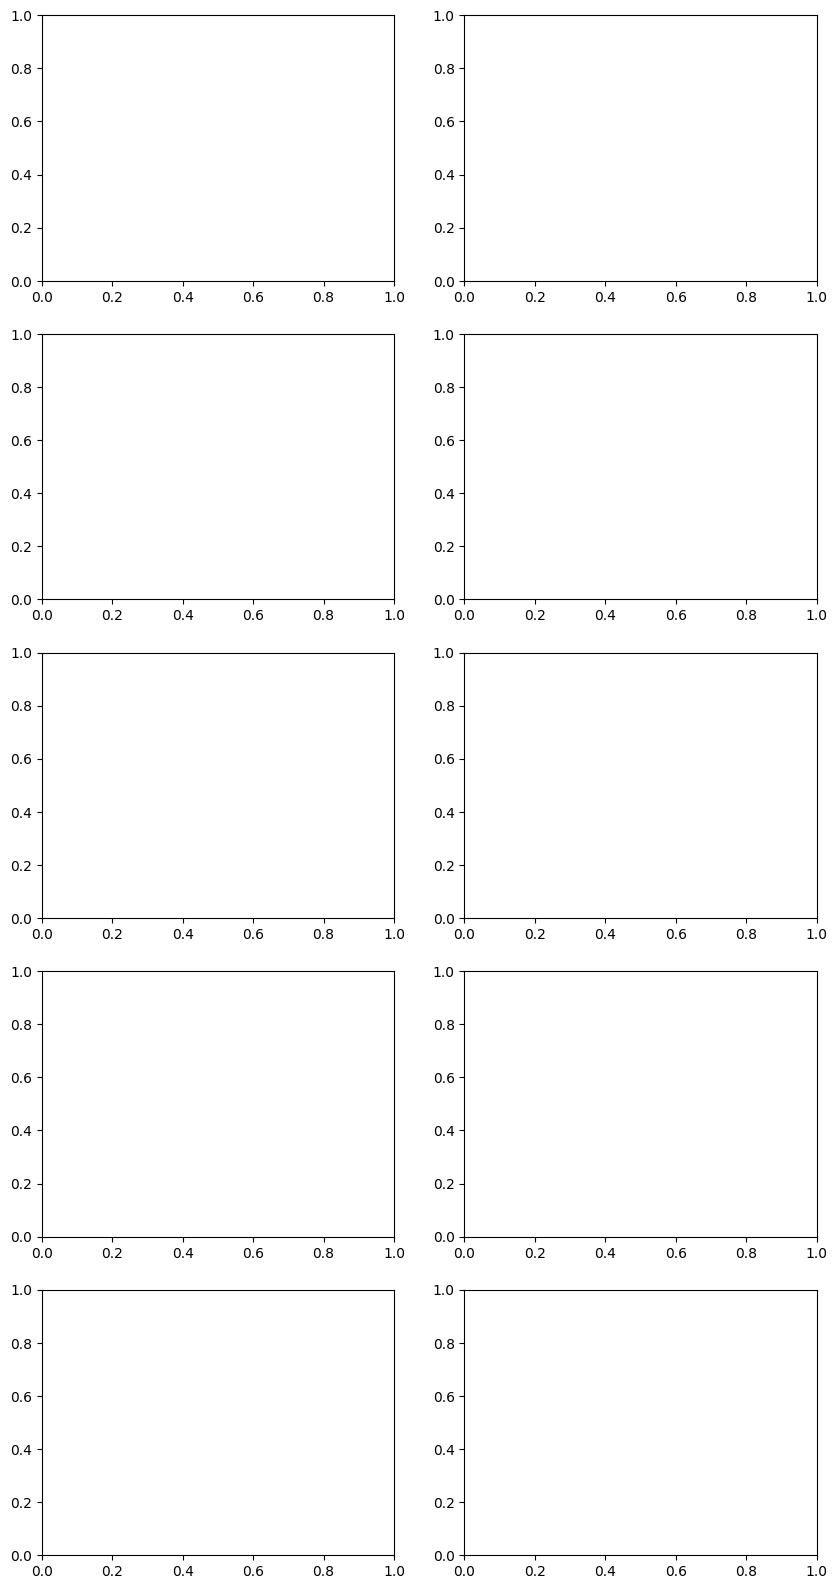

In [16]:
plt.subplots(5, 2, figsize = (10, 20))

for idx, col in enumerate(categorical_columns[:-1]):

    plt.subplot(5,2,idx+1)
    df[col].value_counts().plot(kind='bar')

    plt.title(f'The distribution of {col}')

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 10, not 11

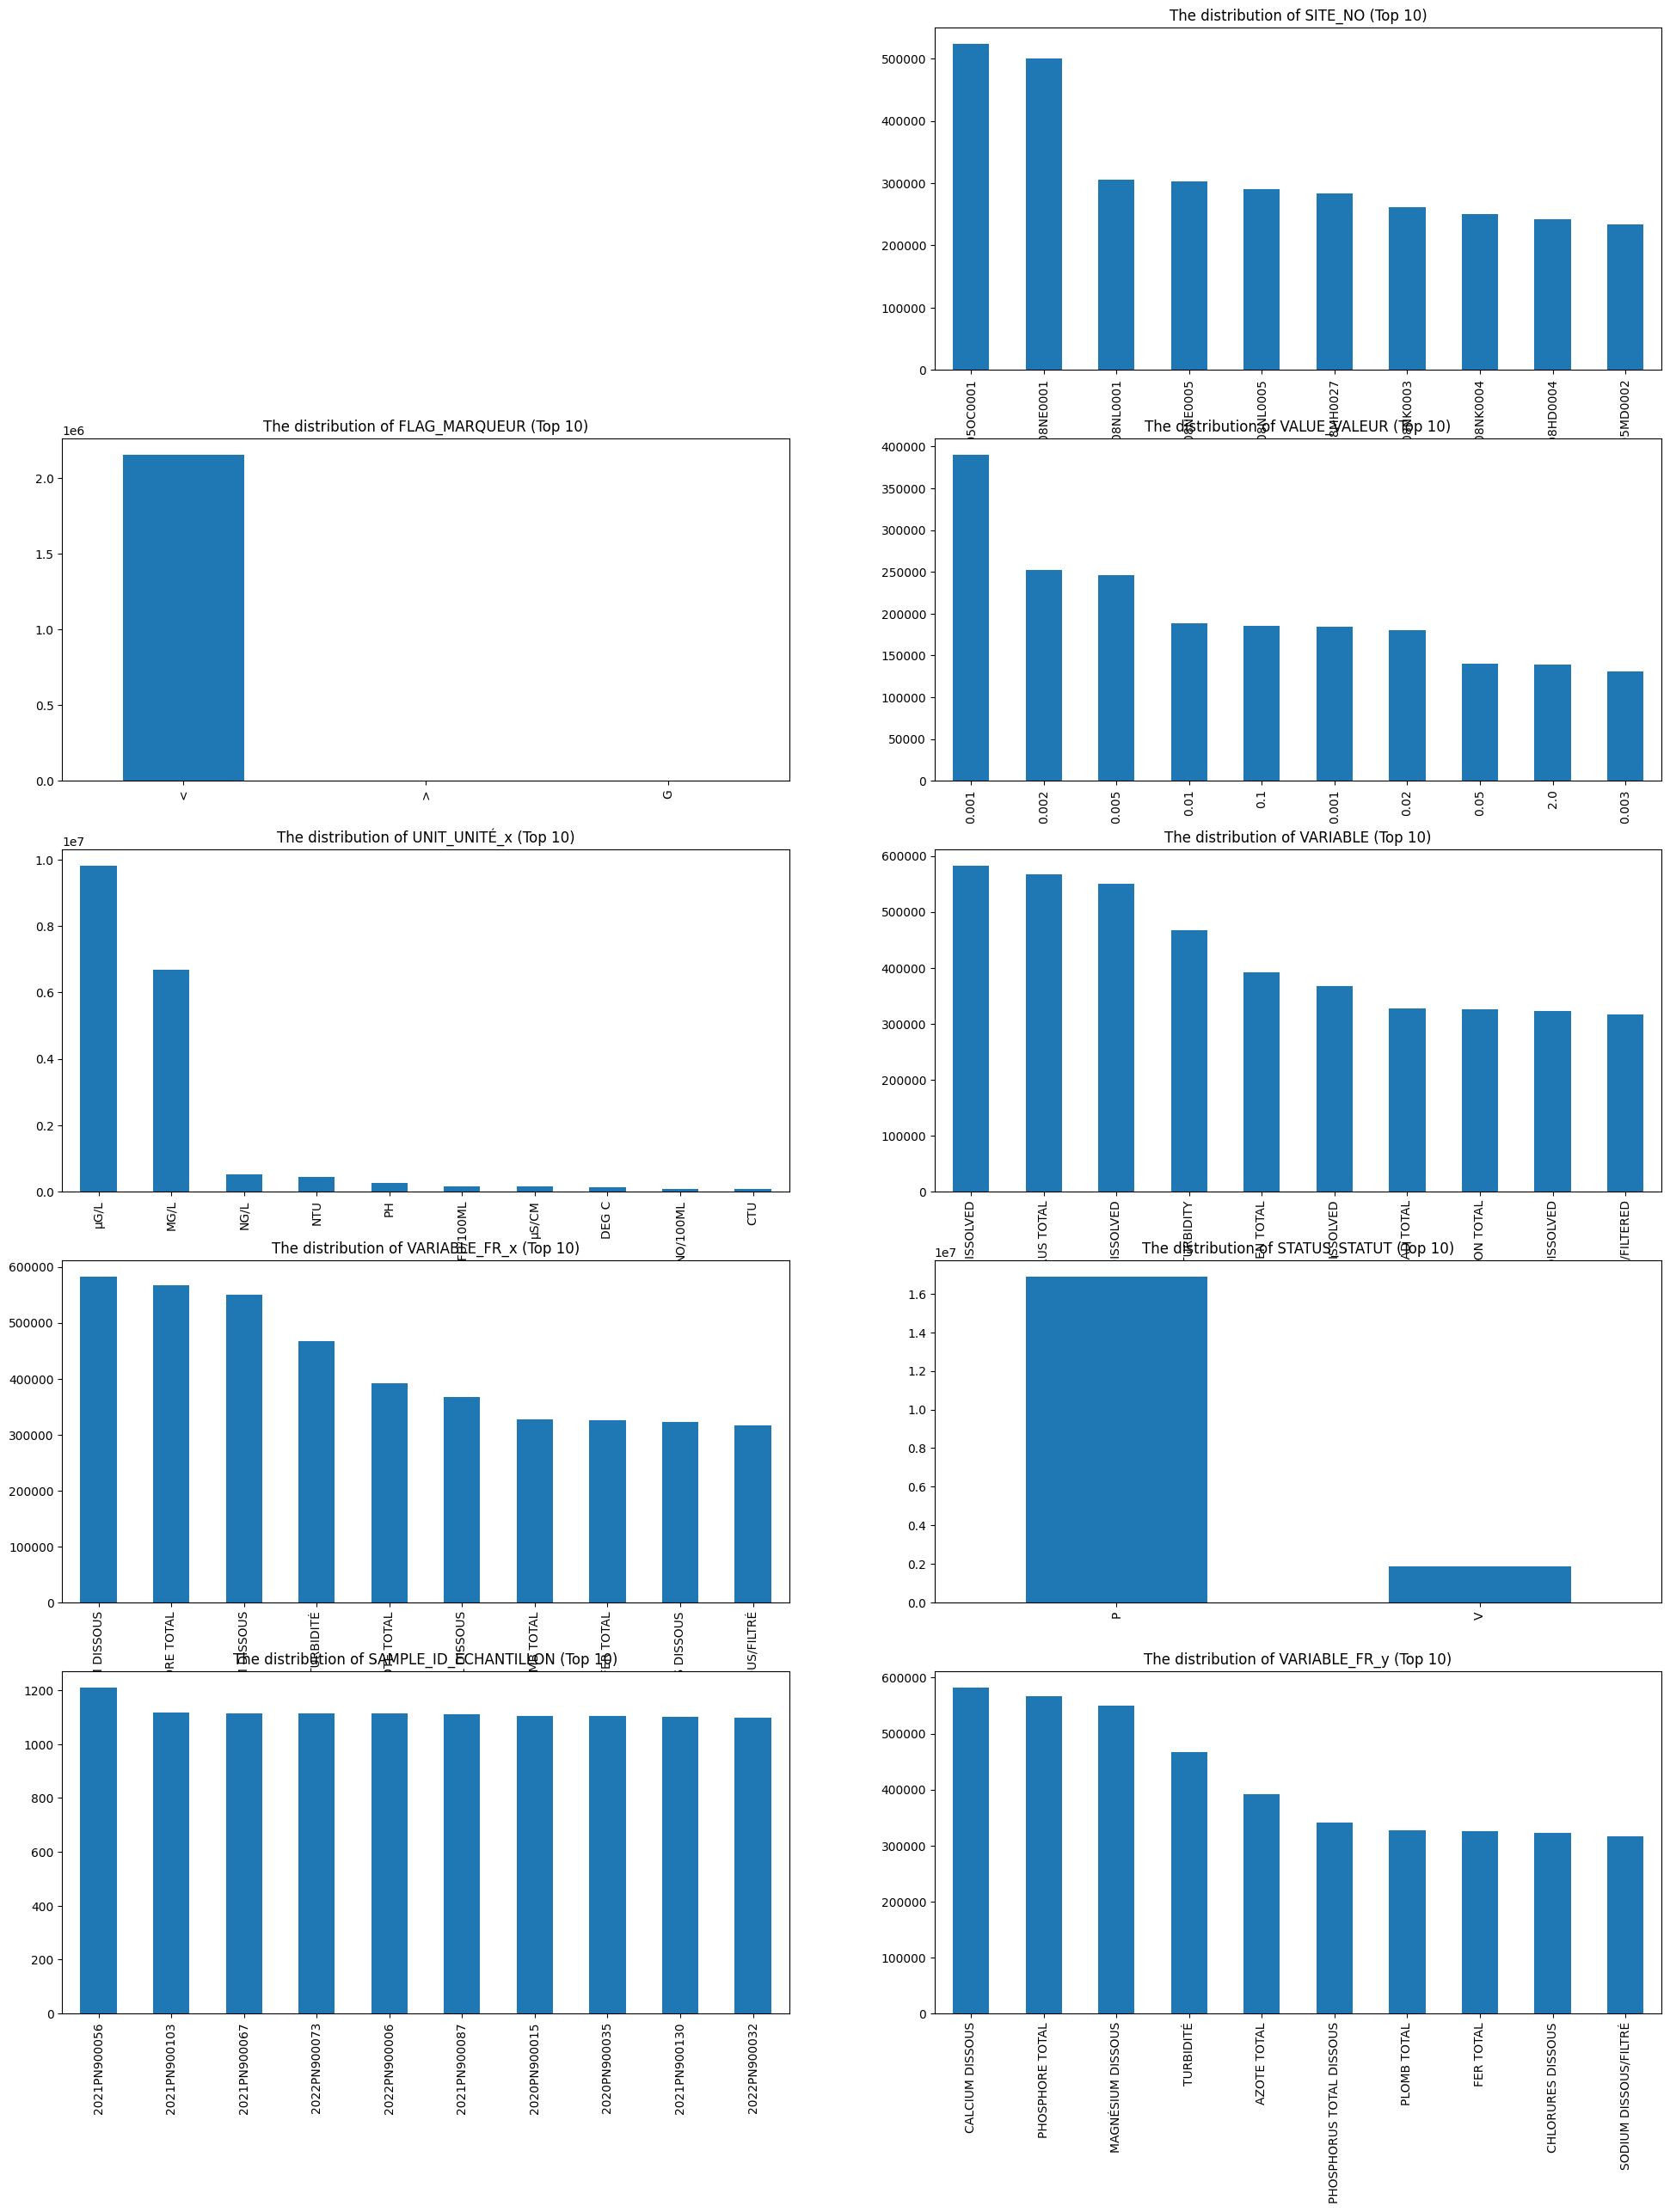

In [17]:
# import pandas as pd
# import plotly.express as px


# **Histogram code for top 10 categories:**

categorical_columns = df.select_dtypes(include=['object']).columns  # for categorical columns that are of object type

# Get top 10 categories for each column
top_10_categories = {}
for col in categorical_columns:
    top_10_categories[col] = df[col].value_counts().nlargest(10)

# Create subplots to visualize top 10 categories
plt.figure(figsize=(24, 30))  # Adjust figure size as needed

for idx, col in enumerate(top_10_categories):
    plt.subplot(5, 2, idx+2)
    top_10_categories[col].plot(kind='bar')
    plt.title(f'The distribution of {col} (Top 10)')

<font color='blue'> Looking at plots above, is clear that the dataset is rather large and contains multiple variables. Nevertheless, I am not ready to drop any columns.</font>

In [18]:
# Filter data for the last 5 years
last_5_years_data = df[df['Year'] >= df['Year'].max() - 5]
last_5_years_data

SITE_NO     DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  \
137393    MA05OB0001 2019-01-14 10:50:00           NaN          309      0.1   
137394    MA05OB0001 2019-01-14 10:50:00           NaN          309      0.1   
137395    MA05OB0001 2019-01-14 10:50:00           NaN          309      0.1   
137396    MA05OB0001 2019-01-14 10:50:00           NaN          309      0.1   
137397    MA05OB0001 2019-01-14 10:50:00           NaN          309      0.1   
...              ...                 ...           ...          ...      ...   
18761825  BC08MH0453 2023-11-20 08:40:00           NaN         3.27      0.1   
18761826  BC08MH0453 2023-11-20 08:40:00           NaN         3.27      0.1   
18761827  BC08MH0453 2023-11-20 08:40:00           NaN         3.27      0.1   
18761828  BC08MH0453 2023-11-20 08:40:00           NaN         3.27      0.1   
18761829  BC08MH0453 2023-11-20 08:40:00           NaN         3.27      0.1   

          MDL_LDM  VMV_CODE UNIT_UNITÉ_x                VARIABLE  \
137393        NaN     10111         MG/L  ALKALINITY TOTAL CACO3   
137394        NaN     10111         MG/L  ALKALINITY TOTAL CACO3   
137395        NaN     10111         MG/L  ALKALINITY TOTAL CACO3   
137396        NaN     10111         MG/L  ALKALINITY TOTAL CACO3   
137397        NaN     10111         MG/L  ALKALINITY TOTAL CACO3   
...           ...       ...          ...                     ...   
18761825      NaN       157          NTU               TURBIDITY   
18761826      NaN       157          NTU               TURBIDITY   
18761827      NaN       157          NTU               TURBIDITY   
18761828      NaN       157          NTU               TURBIDITY   
18761829      NaN       157          NTU               TURBIDITY   

                    VARIABLE_FR_x  ...  \
137393    ALCALINITÉ TOTALE CACO3  ...   
137394    ALCALINITÉ TOTALE CACO3  ...   
137395    ALCALINITÉ TOTALE CACO3  ...   
137396    ALCALINITÉ TOTALE CACO3  ...   
137397    ALCALINITÉ TOTALE CACO3  ...   
...                           ...  ...   
18761825                TURBIDITÉ  ...   
18761826                TURBIDITÉ  ...   
18761827                TURBIDITÉ  ...   
18761828                TURBIDITÉ  ...   
18761829                TURBIDITÉ  ...   

                                                  SITE_DESC LATITUDE  \
137393                                                  NaN  49.0314   
137394                                                  NaN  49.0314   
137395                                                  NaN  49.0314   
137396                                                  NaN  49.0314   
137397                                                  NaN  49.0314   
...                                                     ...      ...   
18761825  NEAR RIGHT BANK APPROX 12KM UPSTREAM FROM MOUT...  49.1486   
18761826  NEAR RIGHT BANK APPROX 12KM UPSTREAM FROM MOUT...  49.1486   
18761827  NEAR RIGHT BANK APPROX 12KM UPSTREAM FROM MOUT...  49.1486   
18761828  NEAR RIGHT BANK APPROX 12KM UPSTREAM FROM MOUT...  49.1486   
18761829  NEAR RIGHT BANK APPROX 12KM UPSTREAM FROM MOUT...  49.1486   

          LONGITUDE  DATUM PROV_TERR               PEARSEDA        OCEANDA  \
137393    -98.27780  NAD27      MAN.        ASSINIBOINE-RED     HUDSON BAY   
137394    -98.27780  NAD27      MAN.        ASSINIBOINE-RED     HUDSON BAY   
137395    -98.27780  NAD27      MAN.        ASSINIBOINE-RED     HUDSON BAY   
137396    -98.27780  NAD27      MAN.        ASSINIBOINE-RED     HUDSON BAY   
137397    -98.27780  NAD27      MAN.        ASSINIBOINE-RED     HUDSON BAY   
...             ...    ...       ...                    ...            ...   
18761825 -123.03859  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
18761826 -123.03859  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
18761827 -123.03859  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
18761828 -123.03859  NAD83      B.C.  FRASER-LOWER MAINLAND  PACIFIC OCEAN   
1876182

### Section 1.2 - <a id="s1_2"></a> Preliminary visualization and trend analysis

In [19]:
!python -m pip install "git+https://github.com/javadba/mpld3@display_fix"

  Cloning https://github.com/javadba/mpld3 (to revision display_fix) to /tmp/pip-req-build-v4yd9r5p
  Running command git clone --filter=blob:none --quiet https://github.com/javadba/mpld3 /tmp/pip-req-build-v4yd9r5p
  Running command git checkout -b display_fix --track origin/display_fix
  Switched to a new branch 'display_fix'
  Branch 'display_fix' set up to track remote branch 'display_fix' from 'origin'.
  Resolved https://github.com/javadba/mpld3 to commit 57ed37dbc4749259b1b46cba8bf28de802972adb
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for mpld3: filename=mpld3-0.3.1.dev1-py3-none-any.whl size=116966 sha256=df5caae11afcd7b8dc8979b3799dc37955de08773152b23fa8ceb999a19fef5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-r9bzixe1/wheels/ac/18/7e/22adb40cdaa6b2275ea7b98c395b87929aa3f338e5adf15049
Successfully built mpld3


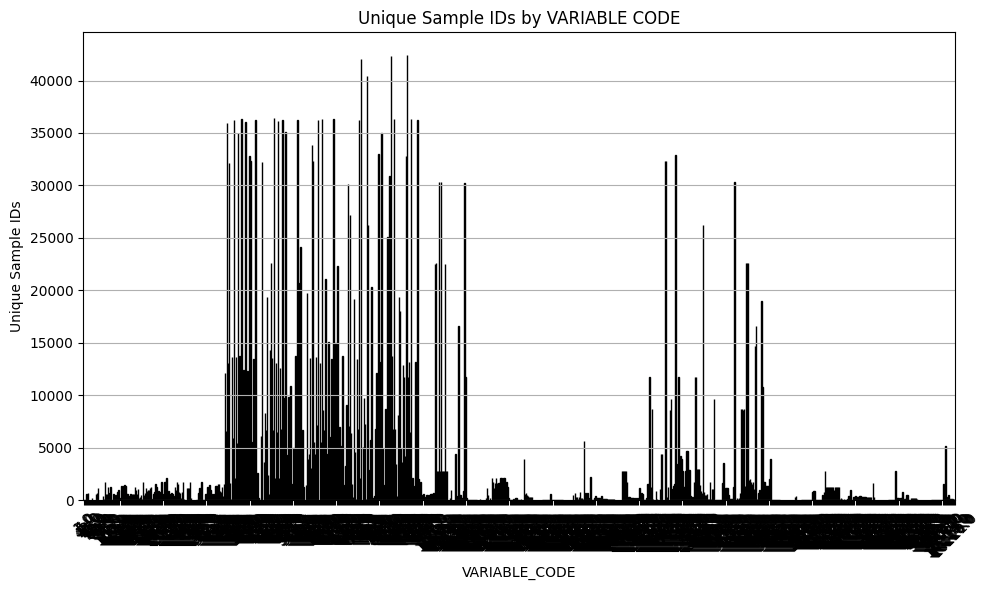

NameError: name 'mpld3' is not defined

In [20]:
from mpld3 import fig_to_html

# Group by VARIABLE CODE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE_CODE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='green', edgecolor='black')
#grouped_counts.plot(kind='bar', cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
# plt.xticks([])  # Hide x-axis ticks
# plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE_CODE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE CODE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Prepare a list with VARIABLE_CODE and VARIABLA descriptions (dictionary)
code_desc_dict = {code: df[df['VARIABLE_CODE'] == code]['VARIABLE'].iloc[0] for code in grouped_counts.index}

# Add hover functionality with tooltips
hover = mpld3. HoverTool(tooltips=[('VARIABLE_CODE', '@VARIABLE_CODE'), ('Description', '@VARIABLE')])
plt.gca().add_tools(hover)

# Convert plot to HTML with tooltip functionality
plot_html = fig_to_html(plt.gcf())

# Display the HTML plot (requires a web browser)
from IPython.display import IFrame
IFrame(plot_html, width="100%", height="400px")


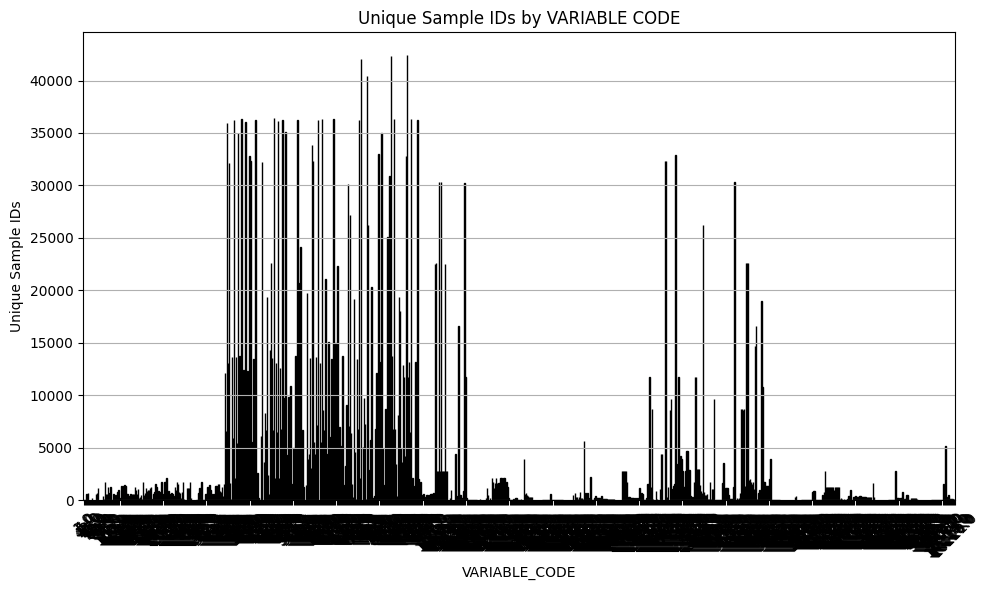

In [21]:
# Group by VARIABLE CODE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE_CODE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='green', edgecolor='black')
#grouped_counts.plot(kind='bar', cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
# plt.xticks([])  # Hide x-axis ticks
# plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE_CODE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE CODE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


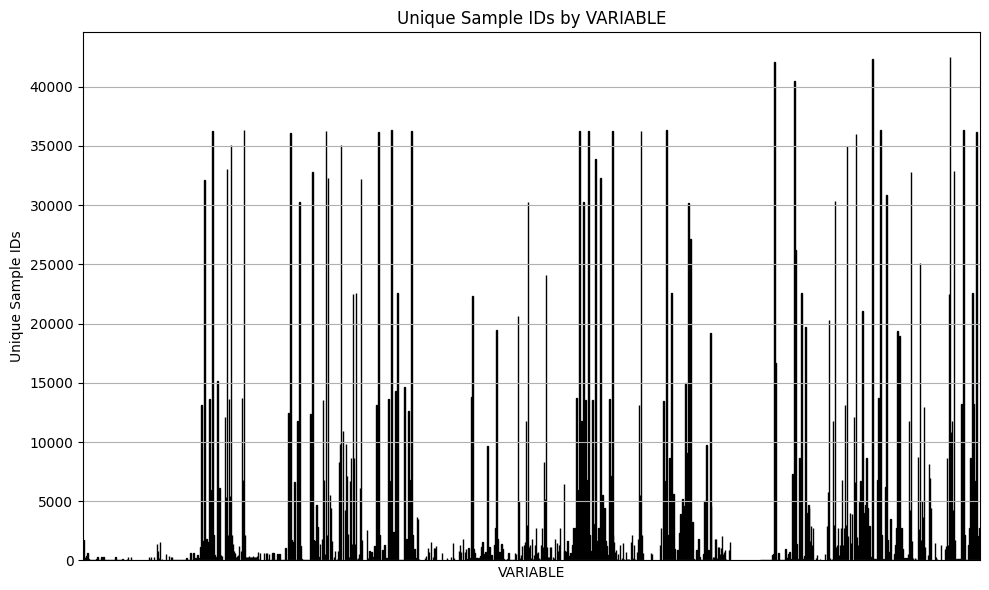

In [22]:


# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='green', edgecolor='black')
#grouped_counts.plot(kind='bar', cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
plt.xticks([])  # Hide x-axis ticks
plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-23-3117a81bb366>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Unique Sample IDs')  # Add label for colorbar


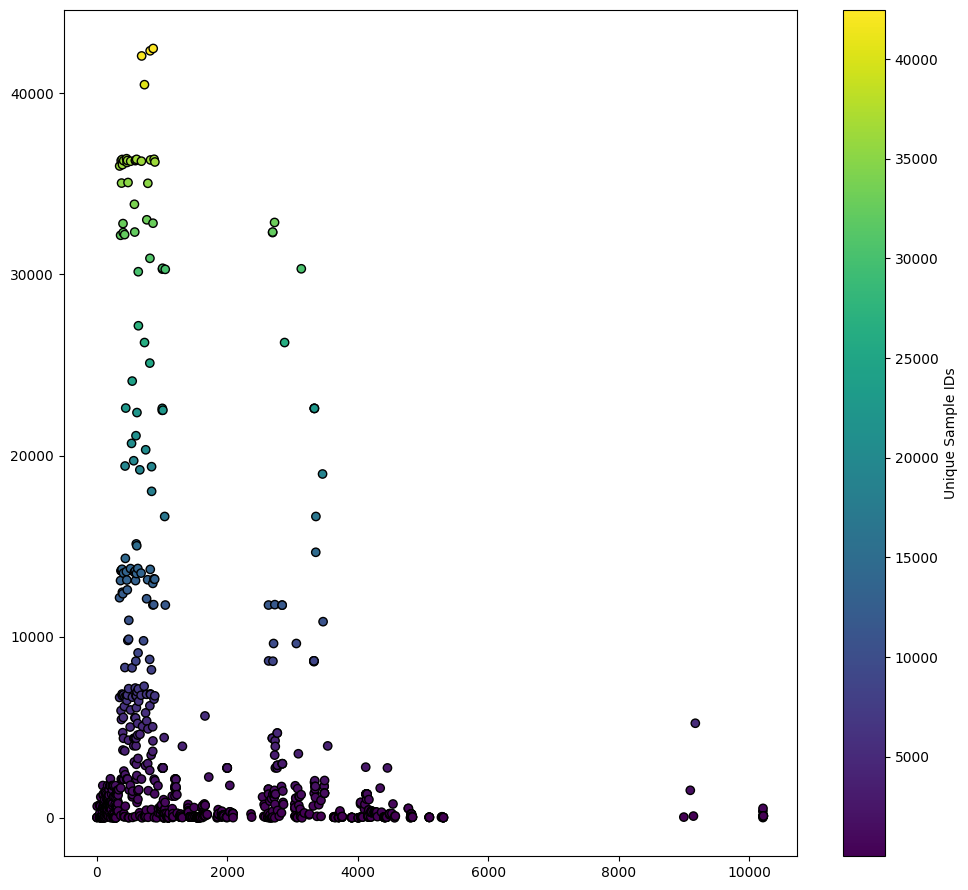

In [23]:
import matplotlib.pyplot as plt

# Group by VARIABLE_CODE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE_CODE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
# plt.xticks([])  # Hide x-axis ticks
# plt.xlabel('')  # Hide x-axis label

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(min(grouped_counts.values), max(grouped_counts.values)))
sm.set_array([])
plt.colorbar(sm, label='Unique Sample IDs')  # Add label for colorbar

plt.tight_layout()
plt.show()


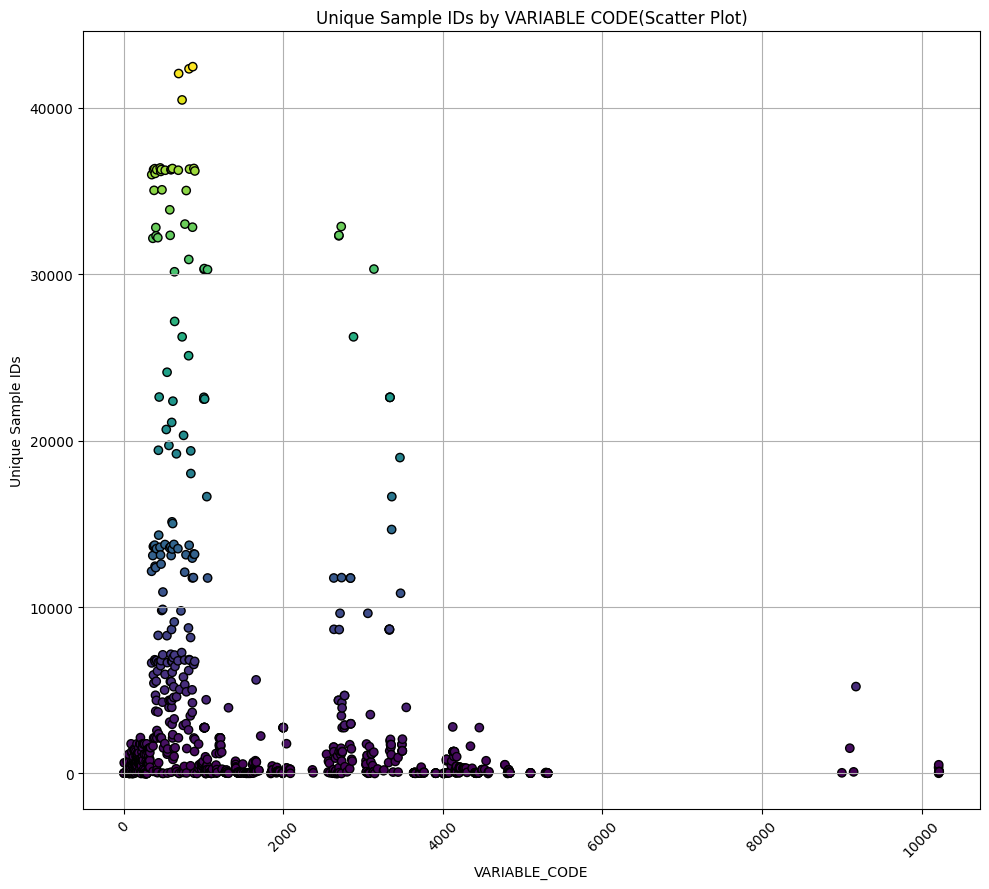

In [24]:
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE_CODE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
# plt.xticks([])  # Hide x-axis ticks
# plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE_CODE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE CODE(Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: cannot unpack non-iterable numpy.int64 object

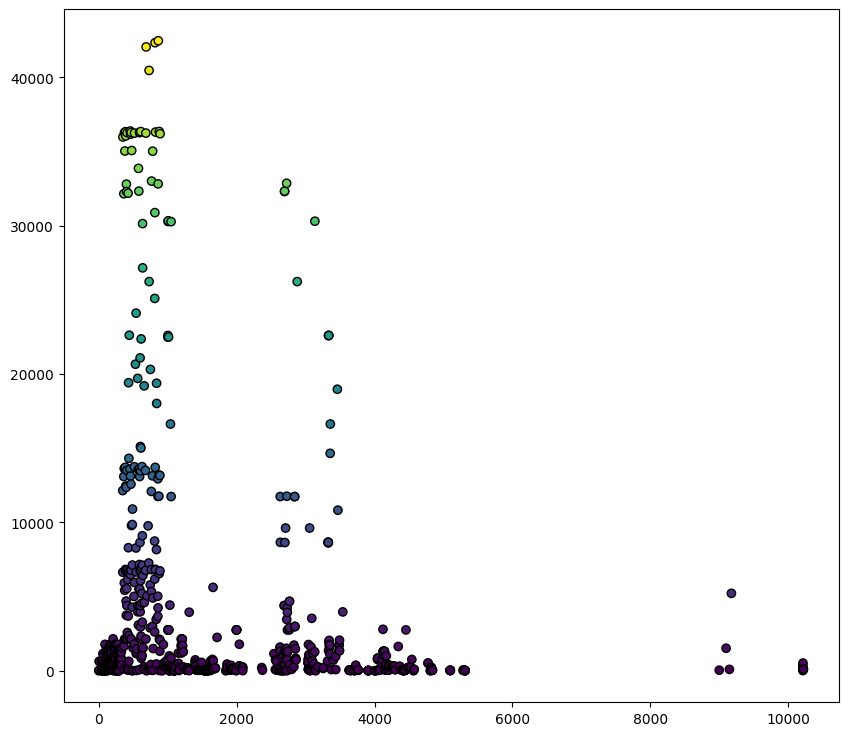

In [25]:
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE_CODE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
# plt.xticks([])  # Hide x-axis ticks
# plt.xlabel('')  # Hide x-axis label

# Get top 3 entries with highest unique sample counts
top_3_codes = grouped_counts.nlargest(3).index.tolist()

# Add annotations for top 3 entries
for i, code in enumerate(top_3_codes):
    x, y = grouped_counts.loc[code]
    plt.annotate(code, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
#plt.xticks([])  # Hide x-axis ticks
#plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#display all column names of DataFrame
print(df.columns.tolist())

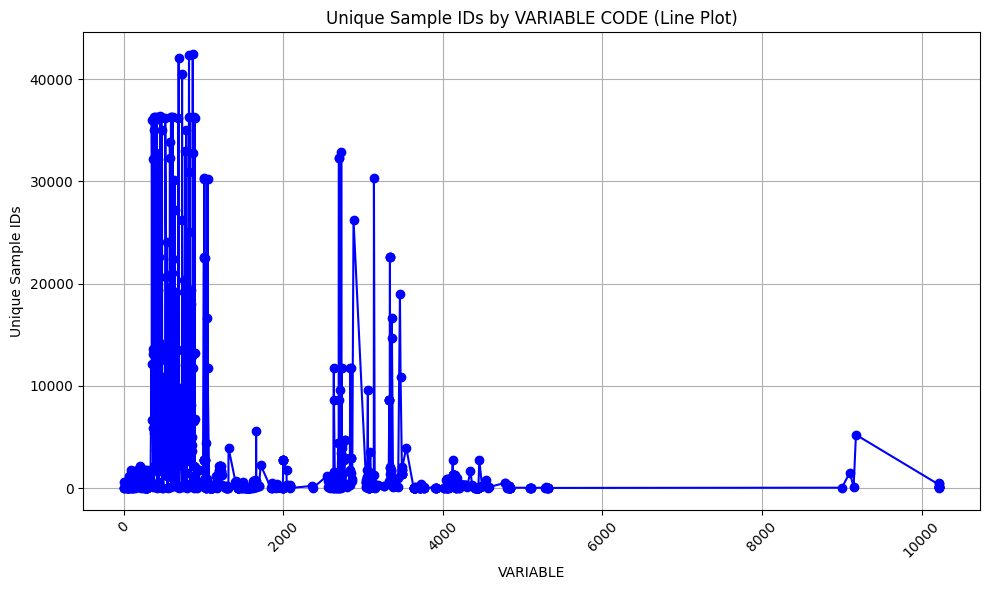

In [27]:
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE_CODE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_counts.index, grouped_counts.values, marker='o', color='blue', linestyle='-', label='Unique Sample IDs')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel('VARIABLE')
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE CODE (Line Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()


<font color='blue'> Attempting to visualize trends.</font>

<ipython-input-26-3cae78aef68b>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


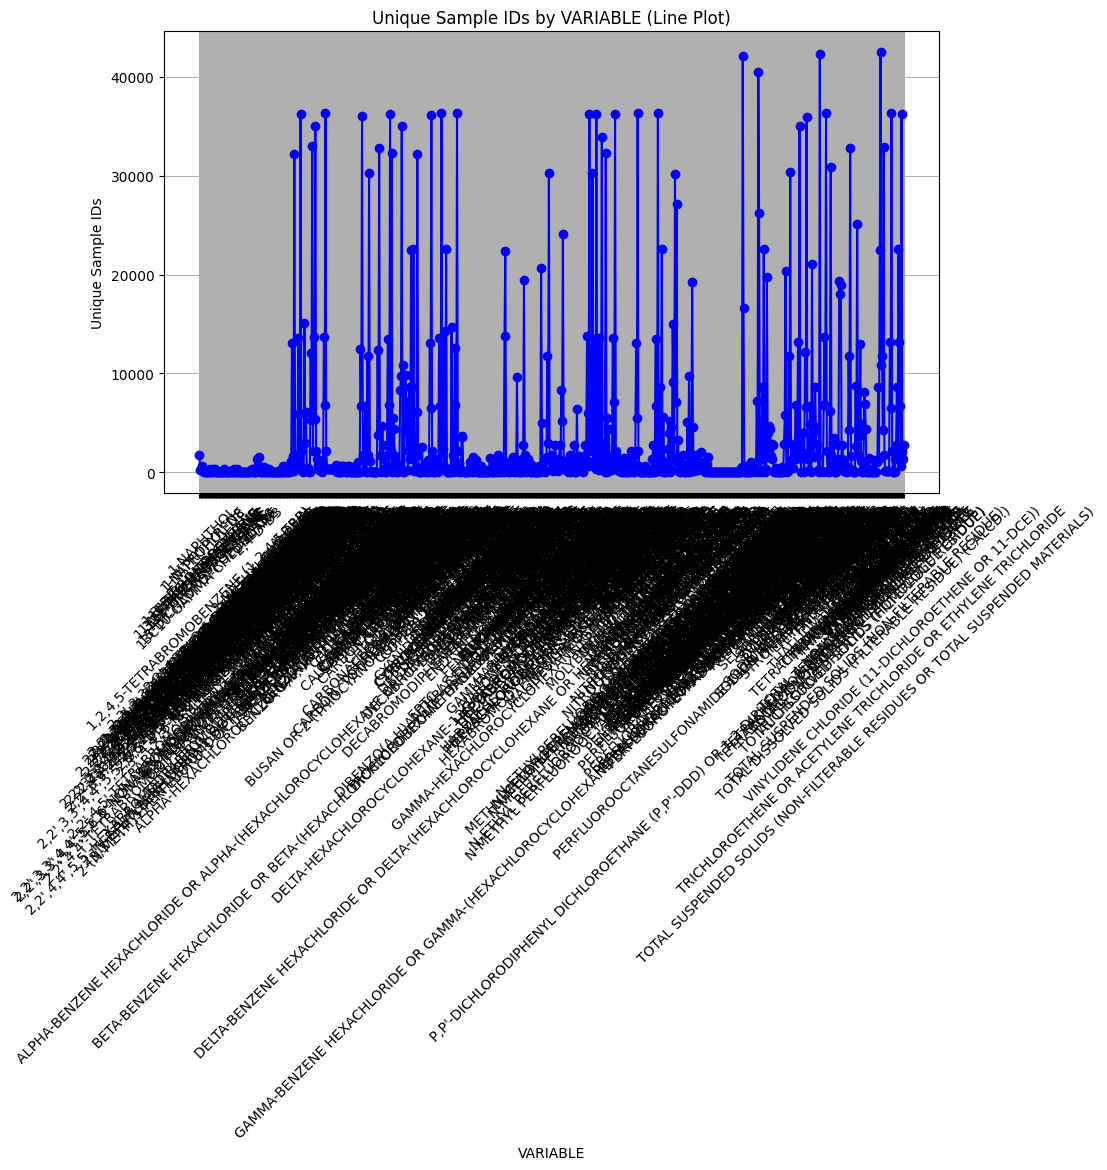

In [26]:


# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_counts.index, grouped_counts.values, marker='o', color='blue', linestyle='-', label='Unique Sample IDs')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel('VARIABLE')
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Line Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()



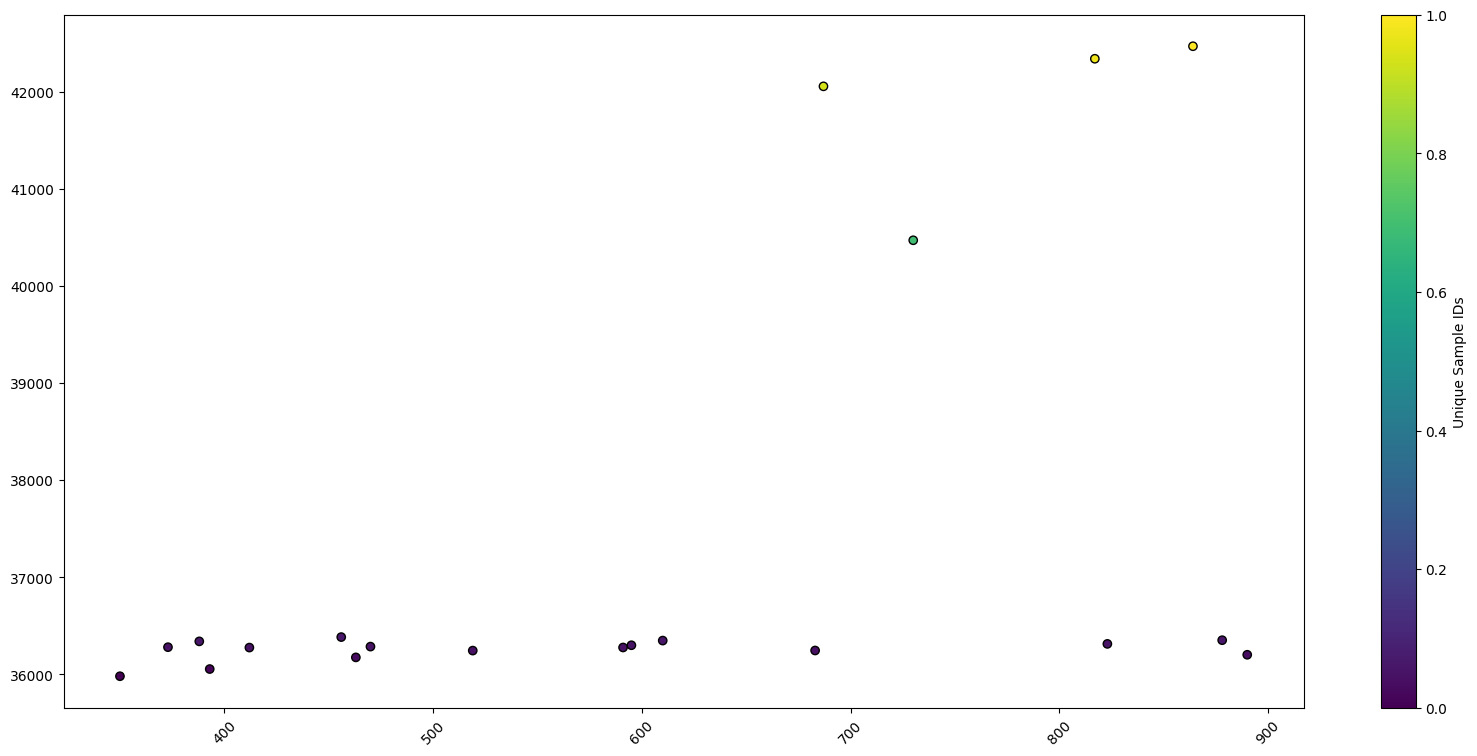

In [28]:
# Filter top 20 variables
top_20_counts = grouped_counts.sort_values(ascending=False).head(20)

# Create colormap based on counts
cmap = plt.cm.viridis
norm = plt.Normalize(top_20_counts.min(), top_20_counts.max())

# Create scatter plot
plt.figure(figsize=(20, 9))
plt.scatter(top_20_counts.index, top_20_counts.values, c=cmap(norm(top_20_counts.values)), edgecolor='black')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)  # Adjust the angle as needed (e.g., 90 for vertical)


plt.colorbar(label='Unique Sample IDs')  # Add colorbar to show count legend
plt.show()


In [29]:
import pandas as pd

# Assuming df is your DataFrame with columns 'Year', 'PROV_TERR', and 'VARIABLE'

# Step 1: Filter the DataFrame for the last 10 years
last_10_years_data = df[df['Year'] >= df['Year'].max() - 10]

# Step 2 & 3: Group by 'PROV_TERR' and 'VARIABLE', and count occurrences
variable_counts_by_province = last_10_years_data.groupby(['PROV_TERR', 'VARIABLE']).size().reset_index(name='count')

# Step 4: Sort the aggregated data within each province
variable_counts_by_province_sorted = variable_counts_by_province.sort_values(by=['PROV_TERR', 'count'], ascending=[True, False])

# Step 5: Select the top 25 variables for each province
top_25_variables_by_province = variable_counts_by_province_sorted.groupby('PROV_TERR').head(25)

# Now you have the top 25 variables for each province for the last 10 years


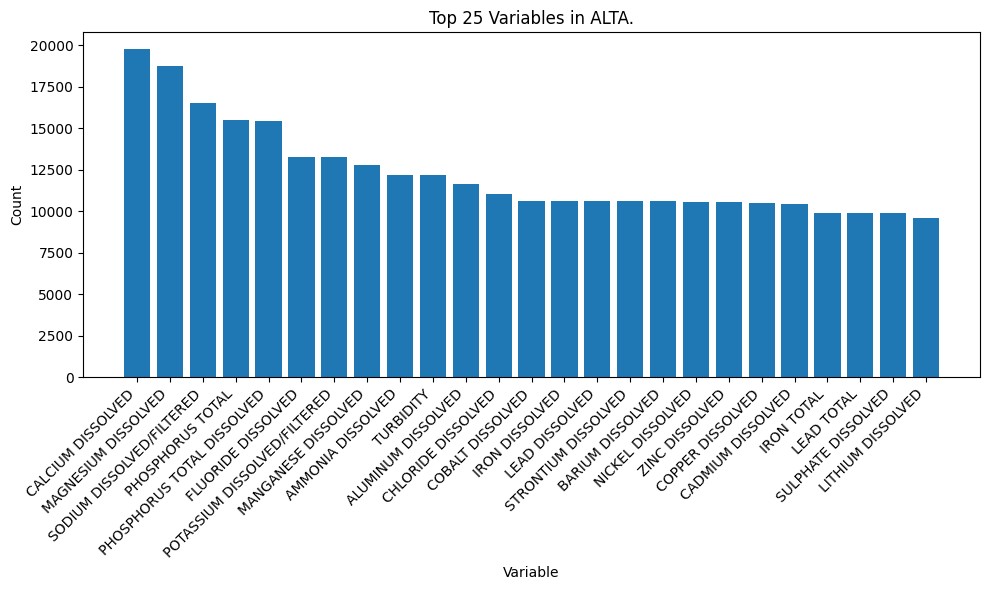

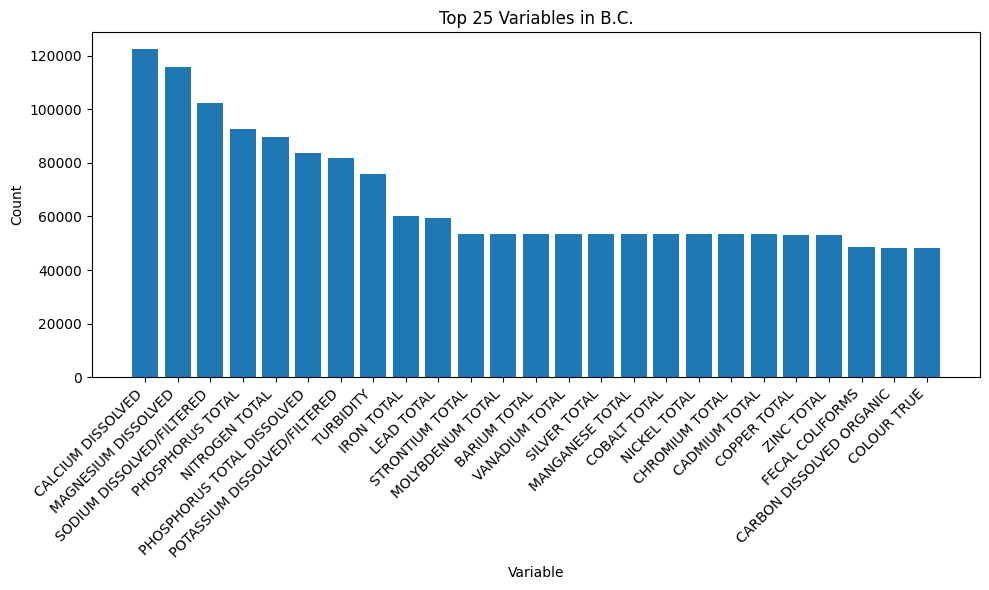

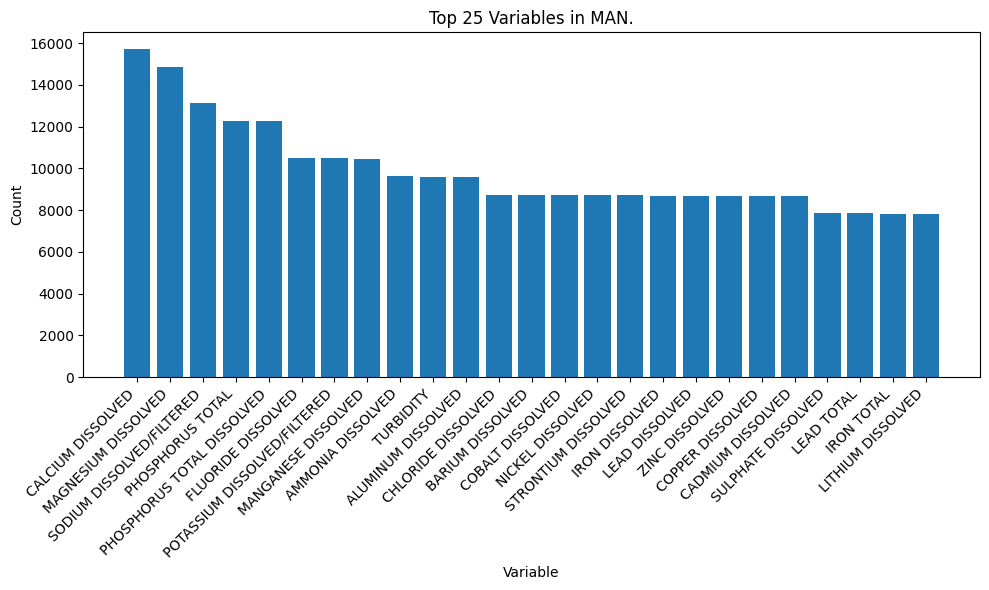

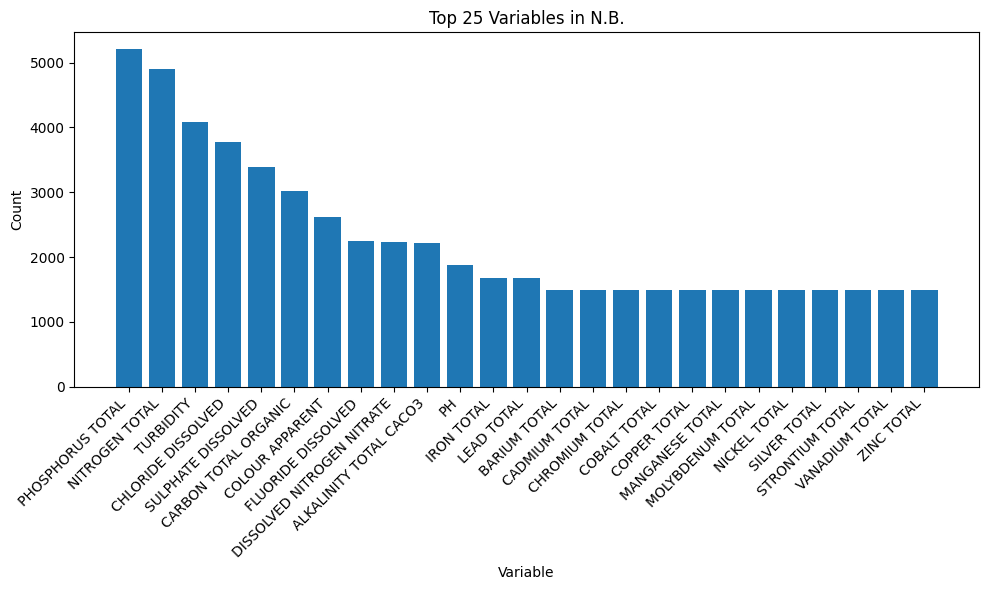

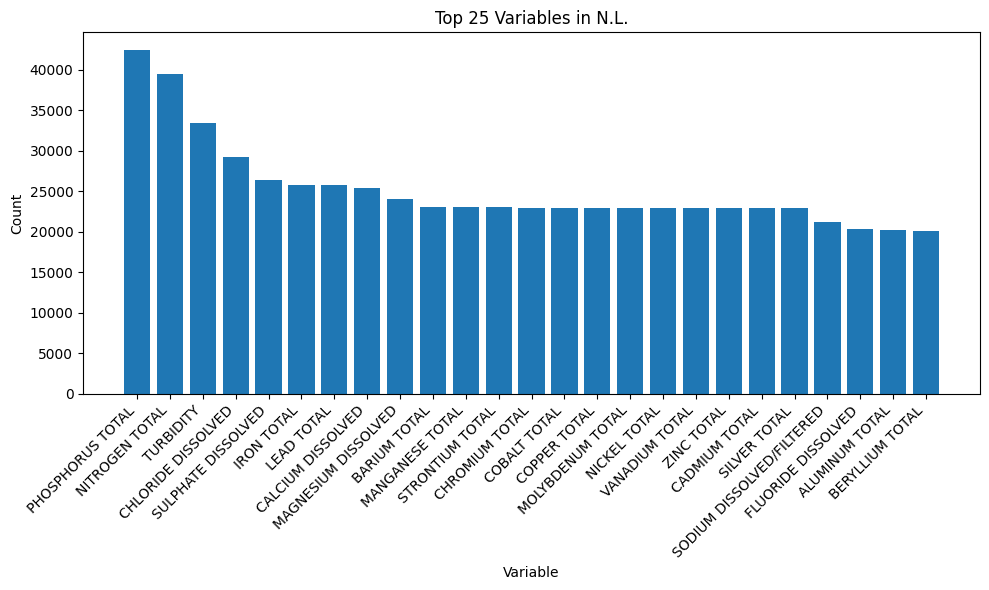

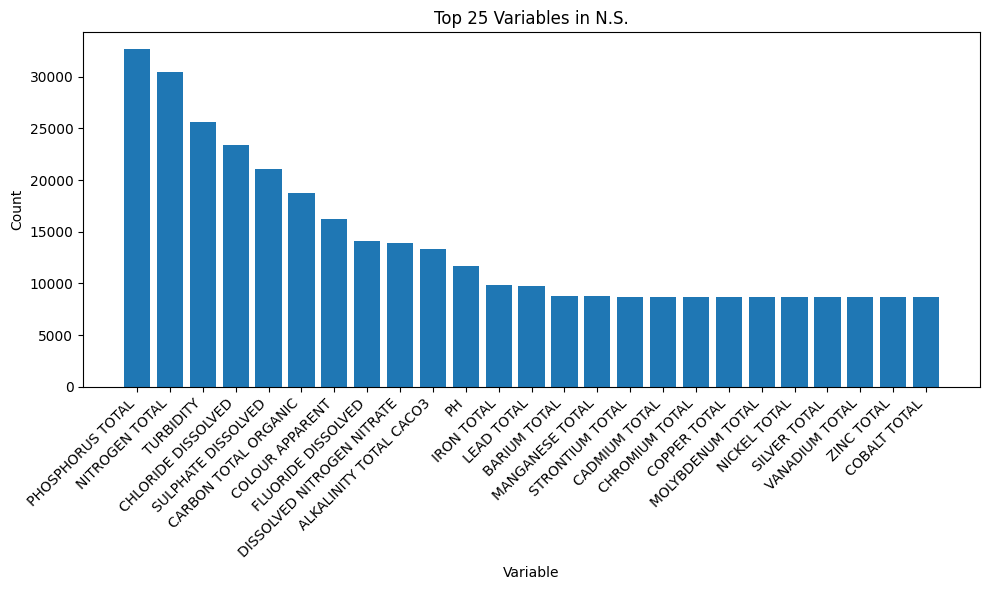

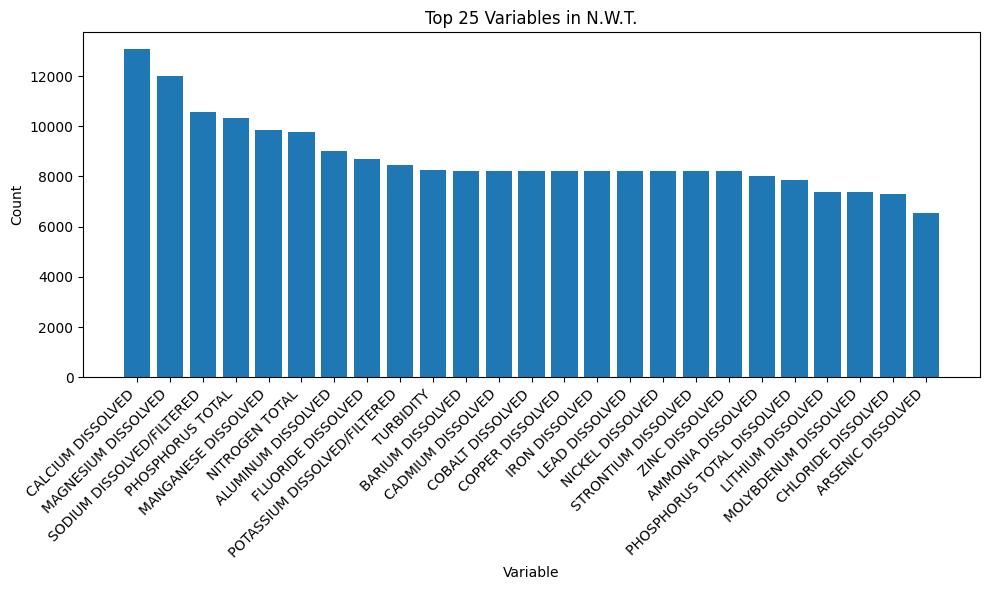

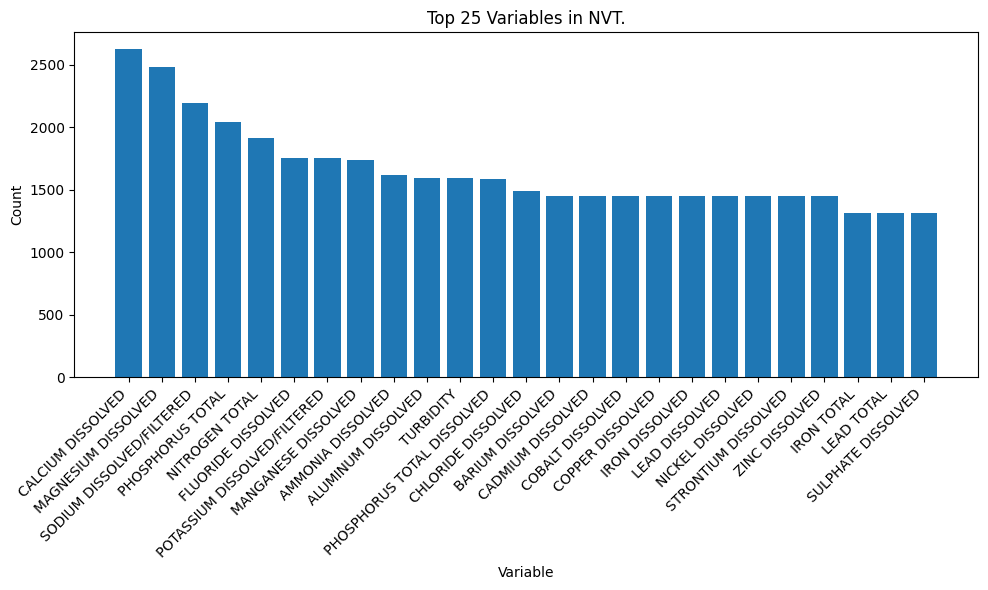

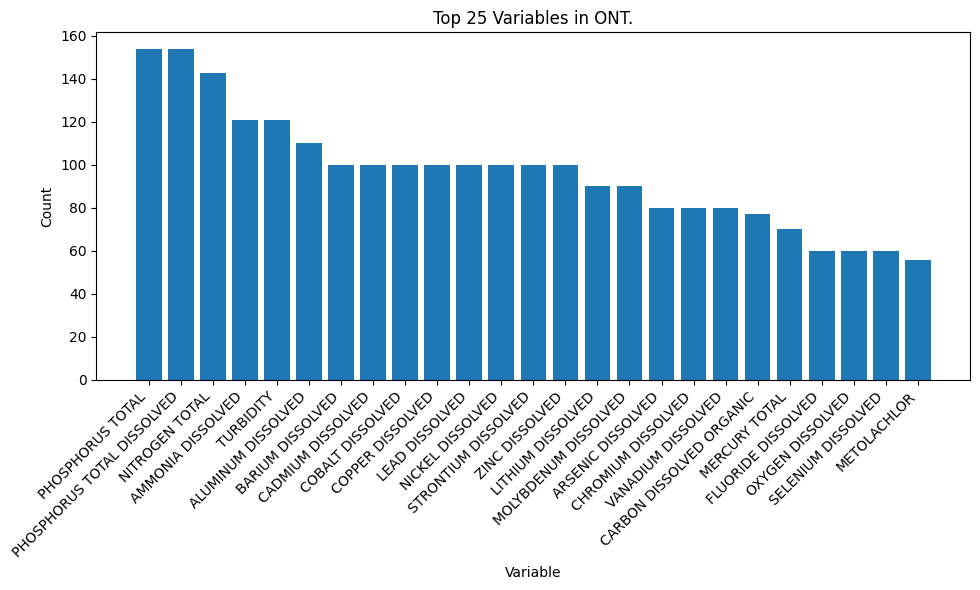

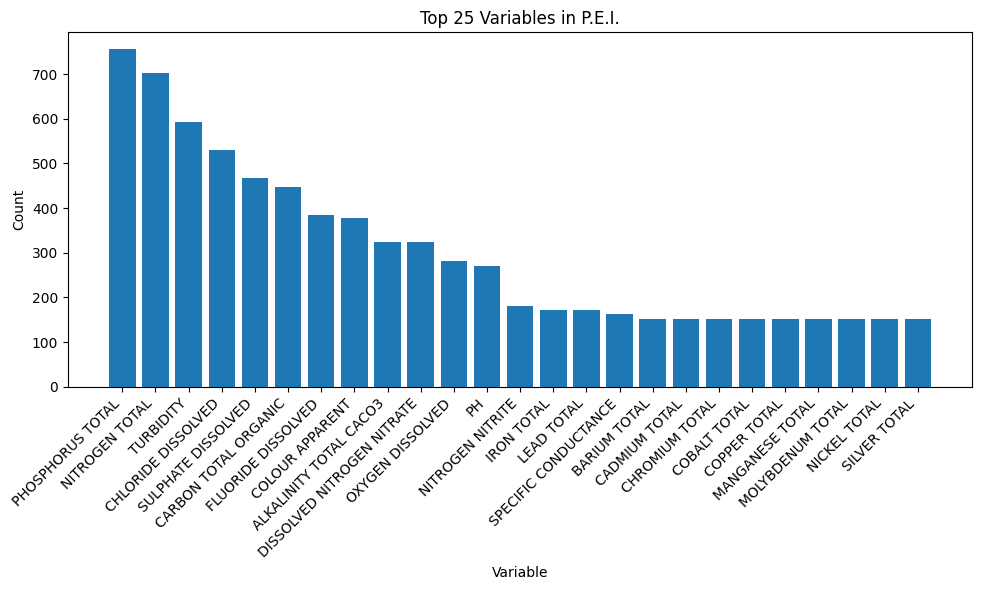

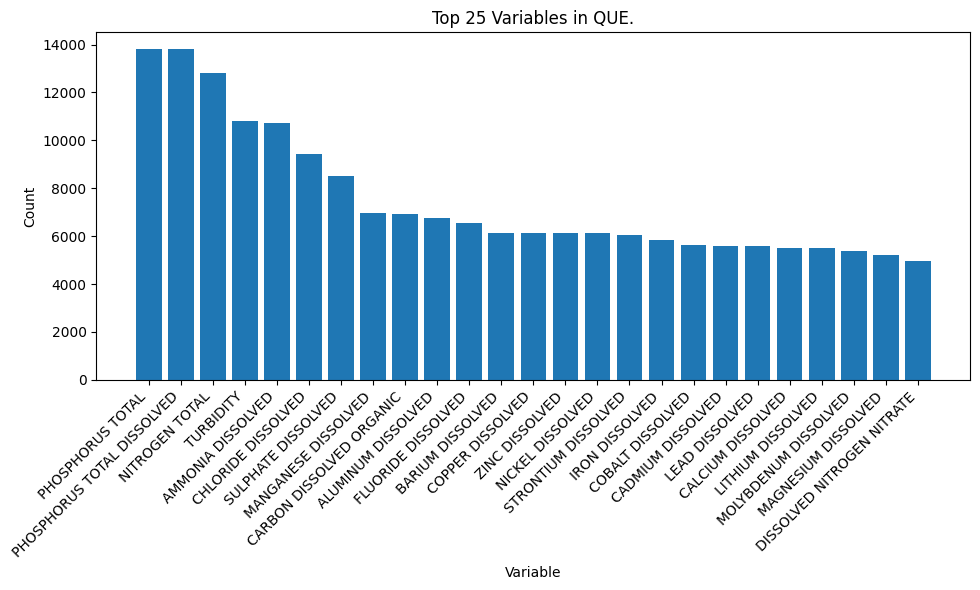

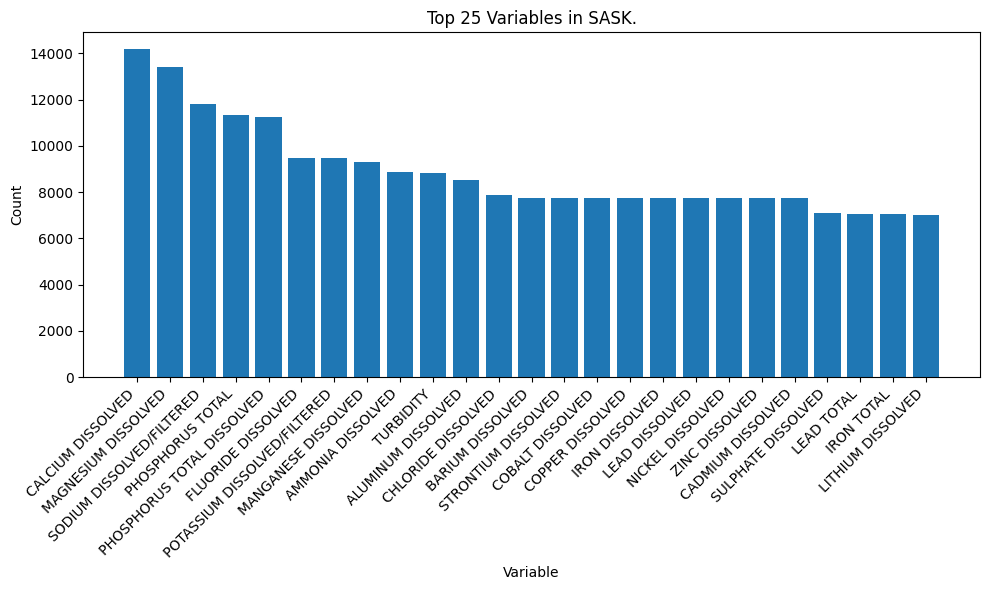

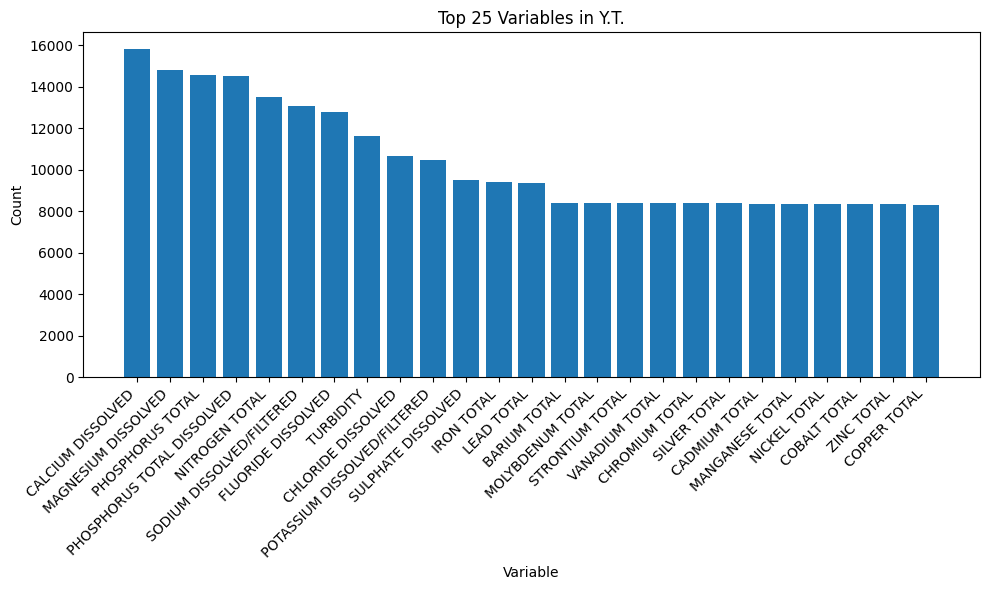

In [30]:
import matplotlib.pyplot as plt

# Assuming you have top_25_variables_by_province DataFrame with columns 'PROV_TERR', 'VARIABLE', and 'count'

# Iterate over each province
for province, group_data in top_25_variables_by_province.groupby('PROV_TERR'):
    plt.figure(figsize=(10, 6))
    plt.bar(group_data['VARIABLE'], group_data['count'])
    plt.title(f'Top 25 Variables in {province}')
    plt.xlabel('Variable')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


# Part 2 - Exploratory Data Analysis <a id="p2"></a>

Map

In [33]:
!pip install dash plotly

In [34]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd  # Import pandas for data manipulation

# Load your data (replace with the actual path to your data file)
#data = pd.read_csv("your_data_file.csv")  # Assuming CSV format
data = df

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Water Monitoring Sites - Canadian River Basins", style={'textAlign': 'center'}),  # Title
    dcc.Graph(
        id='map-plot',
        figure=px.scatter_mapbox(data, lat="LATITUDE", lon="LONGITUDE", hover_name="SITE_NAME",
                                 color_discrete_sequence=["fuchsia"], zoom=10, height=600,
                                 mapbox_style="open-street-map", center=dict(lat=data['LATITUDE'].mean(), lon=data['LONGITUDE'].mean()))
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# Part 3 - Preprocessing <a id="p3"></a>

In [ ]:
# Checking correlation between numeric variables
df.corr(numeric_only = True)

Covariance

In [ ]:
# Plotting

import seaborn as sns
sns.heatmap(df.corr(numeric_only = True), cmap='coolwarm')
plt.show()

<font color='blue'> There seems to be a correlation between the Latitude and the VMV_CODE.</font>

Checking if the correlations are statistically significant.

In [ ]:
# We will use Pearson correlation tests and we will focus on positively correlated columns.


# Calculating the correlation coefficients and p-values
corr1, pval = stats.pearsonr(df['VARIABLE_CODE'], df['METHOD_CODE'])
corr2, pval = stats.pearsonr(df['VARIABLE_CODE'], df['Year'])

# Format p-value manually with 6 decimal places
formatted_pval = f"{pval:.8f}"

# Printing the results
print("-" * 30)
print(f"VMV_CODE vs. Latitude")
print(f"    - correlation coefficient: {corr1:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)

print("-" * 30)
print(f"VMV_CODE vs. Variable Code")
print(f"    - correlation coefficient: {corr2:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)


# Interpretation
# A correlation coefficient close to 1 indicates a strong positive relationship.
# A correlation coefficient close to -1 indicates a strong negative relationship.
# A p-value close to 0 indicates a statistically significant correlation.


Our goal is to model the volume of one specific chemical over time. So, the dependent variable is VMV_CODE and the independent variable is LATITUDE. We will split the data up accordingly.

In [ ]:
X = df['LATITUDE'] # independent, often referenced as "X" by convention
y = df['VMV_CODE'] # dependent, often referenced as "y" by convention

In [ ]:
np.var(X)

In [ ]:
np.cov(X, y)

In [ ]:
df.cov()

In [ ]:
print(np.corrcoef(X,y))

In [ ]:
df.corr()

### Section 3.1 - <a id="q3_1"></a>  Basic Statistics

Null Hypothesis (H0): there is no significant association between VARIABLE (CARBON TOTAL ORGANIC?) occurrence and the SITE
Alternative Hypothesis (H1): there is a significant association between VARIABLE (CARBON TOTAL ORGANIC?) occurrence and the SITE

Being categorical data types, we determine that Chi Squared is the suitable hypothesis test

In [ ]:
# Correlation between numeric values

df.corr(numeric_only = True)


In [ ]:
# A convenience function from scipy.stats
tval,p = stats.pearsonr(X,y)
print("T={} p={}".format(tval,p))

In [ ]:
# A convenience function from scipy.stats
tval,p = stats.pearsonr(X,y)
print("T={:4.3f} p={:4.3f}".format(tval,p))

Scatter Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Latitude and VMV_Code are already defined (replace with your actual data)

data  = pd.DataFrame({'LATITUDE', 'MVM_CODE'})

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LATITUDE', y='VMV_CODE', data=data)

# Adjust subplot layout (optional)
plt.subplots_adjust(left=0.2)  # Adjust left margin (example)

plt.show()


In [ ]:
plt.scatter(LATITUDE, MVM_CODE)

In [ ]:
# We now perform further analysis to determine if the correlations are statistically significant.
# We will use Pearson correlation tests and we will focus on positively correlated columns.


# Calculating the correlation coefficients and p-values
corr1, pval = stats.pearsonr(df['VMV_CODE'], df['LATITUDE'])
corr2, pval = stats.pearsonr(df['METHOD_CODE'], d1['VARIABLE_CODE'])

# Format p-value manually with 6 decimal places
formatted_pval = f"{pval:.8f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"    - correlation coefficient: {corr1:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"    - correlation coefficient: {corr2:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)


# Interpretation
# A correlation coefficient close to 1 indicates a strong positive relationship.
# A correlation coefficient close to -1 indicates a strong negative relationship.
# A p-value close to 0 indicates a statistically significant correlation.

In [ ]:
# Sample data with missing values and mixed data types
data = {'VMV_CODE': [1, 2, 3, None, 5, 'inf'],
        'SDL_LDE': [10, 12, None, None, 18, 'abc'],
        'MDL_LDM': [8, 11, 13, None, 16, np.inf]}
df = pd.DataFrame(data)

# Handle missing values (e.g., replace with mean or median)
df['VMV_CODE'].fillna(df['VMV_CODE'].mean(), inplace=True)  # Replace NaN with mean
df['SDL_LDE'].fillna(df['SDL_LDE'].median(), inplace=True)  # Replace NaN with median
df['MDL_LDM'] = pd.to_numeric(df['MDL_LDM'], erxrors='coerce')  # Convert to numeric, handle non-numeric

# Calculate correlation coefficients and p-values
corr1, pval1 = stats.pearsonr(df['VMV_CODE'], df['SDL_LDE'])
corr2, pval2 = stats.pearsonr(df['VMV_CODE'], df['MDL_LDM'])

# Format p-values manually with 6 decimal places
formatted_pval1 = f"{pval1:.6f}"
formatted_pval2 = f"{pval2:.6f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"  - correlation coefficient: {corr1:.4f}")
print(f"  - p-value: {formatted_pval1}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"  - correlation coefficient: {corr2:.4f}")
print(f"  - p-value: {formatted_pval2}")
print("-" * 30)


In [ ]:

# Sample data with missing values and mixed data types
data = {'VMV_CODE': [1, 2, 3, None, 5, 'inf'],
        'SDL_LDE': [10, 12, None, None, 18, 'abc'],
        'MDL_LDM': [8, 11, 13, None, 16, np.inf]}
df = pd.DataFrame(data)

# Handle missing values (e.g., replace with mean or median)
df['VMV_CODE'].fillna(df['VMV_CODE'].mean(), inplace=True)  # Replace NaN with mean
df['SDL_LDE'].fillna(df['SDL_LDE'].median(), inplace=True)  # Replace NaN with median
df['MDL_LDM'] = pd.to_numeric(df['MDL_LDM'], erxrors='coerce')  # Convert to numeric, handle non-numeric

# Calculate correlation coefficients and p-values
corr1, pval1 = stats.pearsonr(df['VMV_CODE'], df['SDL_LDE'])
corr2, pval2 = stats.pearsonr(df['VMV_CODE'], df['MDL_LDM'])

# Format p-values manually with 6 decimal places
formatted_pval1 = f"{pval1:.6f}"
formatted_pval2 = f"{pval2:.6f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"  - correlation coefficient: {corr1:.4f}")
print(f"  - p-value: {formatted_pval1}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"  - correlation coefficient: {corr2:.4f}")
print(f"  - p-value: {formatted_pval2}")
print("-" * 30)


Hypothesis testing

In [ ]:
np.mean(X)

In [ ]:
np.mean(y)

alpha: 5%

H0: There is no association between the Latitude and the MVM Code

H1: There is association between the two

In [ ]:
# Grouping data by VARIABLE and SITE NUMBER
grouped_data = df.groupby(['VARIABLE', 'SITE_NO']).size().unstack()

# Performing Chi-square test
chi2, pval, _, _ = stats.chi2_contingency(grouped_data)

# Printing the p-value
print("p-value:", pval)

# Interpreting results
if pval < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in VARIABLE volume among different SITE NUMBERs.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in VARIABLE volume among different SITE NUMBERs.")


<font color='blue'> Revising the hypothesis.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Defining the range for the x-axis (degrees of freedom = 4)
#x = np.arange(0, 20, 0.001)
x = np.linspace(0, 20, 1000)

# Calculating the Chi-square probability density function (PDF)
pdf_values = chi2.pdf(x, df=4)

# Plotting the Chi-square distribution
plt.plot(x, pdf_values, label='Chi-Square (df=4)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-Square Distribution (df=4)')
plt.legend()

# Shade the area corresponding to p-value at the tail
alpha = 0.05  # significance level (adjust as needed)
critical_value = chi2.ppf(1 - alpha, df=4)  # Find the critical value for the given significance level
x_shade = np.linspace(critical_value, x.max(), 100)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=4), color='red', alpha=0.3, label=f'p-value < {alpha}')

# Showing the plot
plt.show()

<font color='blue'> Revising the hypothesis.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Defining the range for the x-axis (degrees of freedom = 4)
#x = np.arange(0, 20, 0.001)
x = np.linspace(0, 20, 1000)

# Calculating the Chi-square probability density function (PDF)
pdf_values = chi2.pdf(x, df=4)

# Plotting the Chi-square distribution
plt.plot(x, pdf_values, label='Chi-Square (df=4)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-Square Distribution (df=4)')
plt.legend()

# Shade the area corresponding to p-value at the tail
alpha = 0.05  # significance level (adjust as needed)
critical_value = chi2.ppf(1 - alpha, df=4)  # Find the critical value for the given significance level
x_shade = np.linspace(critical_value, x.max(), 100)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=4), color='red', alpha=0.3, label=f'p-value < {alpha}')

# Showing the plot
plt.show()

<font color='blue'>Checking categorical columns.</font>

In [ ]:
# Let's visualize the target distribution

df['VMV_CODE'].value_counts(normalize=True).plot(kind='barh', figsize = (5,5))

plt.xlabel('count for each class')
plt.ylabel('category')
plt.show()

In [ ]:
# Looking at all categorical columns

categorical_columns = df.select_dtypes('object').columns
categorical_columns

In [ ]:
len(categorical_columns[:-1])

In [ ]:
plt.subplots(5, 2, figsize = (10, 20))

for idx, col in enumerate(categorical_columns[:-1]):

    plt.subplot(5,2,idx+1)
    df[col].value_counts().plot(kind='bar')

    plt.title(f'The distribution of {col}')

plt.tight_layout()
plt.show()

### Section 3.2 - <a id="q3_2"></a>Linear Regression.

In [ ]:
import statsmodels.api as sm

In [ ]:
X

In [ ]:
y

In [ ]:
X_withconstant = sm.add_constant(X) #we have to add in our intercept manually!

In [ ]:
X_withconstant

We fit a Linear Regression

In [ ]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit() # ----> statsmodels will do the optimization and update the coefs to find the best ones

# Looking at the summary
myregression_results.summary()

# ignore red warning below

In [ ]:
predictions = []

for LATITUDE in X:

    pred =3.279e+04 + 790.0418 * LATITUDE
    predictions.append(pred)

In [ ]:
plt.scatter(X, y)
plt.plot(X, predictions)

<font color='blue'>The model is statistically significant based on the F-statistic, but the R-squared values and the diagnostic tests suggest a very weak relationship between "LATITUDE" and "VMV_CODE."
The coefficient for "LATITUDE" is statistically significant, but its magnitude (790.0418) might not be very meaningful due to the weak relationship.
The non-normality and potential autocorrelation issues in the error terms should be investigated further if you need more reliable results from this model.</font>

In [ ]:
import seaborn as sns

In [ ]:
sns.lmplot(x='LATITUDE', y='VMV_CODE', data=df)

<font color='blue'> Interpretation: ......</font>

<font color='blue'> Interpretation: ......</font>

# Part 4 - Modelling <a id="p4"></a>

# Part 6 - Conclusion <a id="p6"></a>